# Notebook auxiliar para visualización de resultados

El propósito de este Notebook es reunir los resultados obtenidos en la evaluación de modelos de cada dataset, y comparar los resultados obtenidos. Este notebook opera con los resultados generados por cada notebook, los que se almacenan en formato csv en el directorio /csv/ de este repositorio.

## Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.4f}'.format

## Variables de control

La siguiente variable de control controlael comportamiento del notebook. A continuación se detalla su utilidad:

* NOTEBOOK_FOLDER_PATH: Esta variable de control es usada para indicar la ubicación del directorio de este notebook, para poder hacer los paths a los distintos paths requeridos para leer o guardar datos desde disco. Se recomienda que esta variable tenga el path relativo del directorio donde se encuentra este notebook respecto al directorio de trabajo del servidor Jupyter. El valor predeterminado asume que el reposiorio de este proyecto ha sido clonado en el directorio de trabajo del servidor Jupyter.
* SAVE_FIGURES: Esta variable controla si se almacenan o no los gráficos en disco. El valor por defecto, False, impide que se almacenen. Para que esta tarea funcione correctamente, debe existir un directorio /figures/ en el directorio donde se encuentra este Notebook.

In [2]:
# Este valor debe ser un string
NOTEBOOK_FOLDER_PATH = './proyecto-memoria'

# Este valor debe ser un booleano
SAVE_FIGURES = True

## Definción de constantes

A continuación se definen algunas constantes usadas en la ejecución del código. Se recomienda no cambiarlas, ya que controlan almacenamiento de datos y etiquetas en gráficos.

In [3]:
# Datasets a trabajar
dataset_names =  ['Yakutia', 'Malaga', 'Alemana']

# Métricas a trabajar
scores = ['MSE', 'MAE', 'R2']

# Conjuntos de hiperparametros 
params = ['pred', 'opt']

# resultados de actividades de validación cruzada y evaluación
tests = ['cross_val', 'test']

# Etiquetas para métricas en gráficos
score_labels = {'MSE': 'Error Cuadrático Medio (MSE)',
               'MAE': 'Error Absoluto Medio (MAE)',
               'R2': 'Puntaje $R^2$ (Recortado en 0 mín.)'}

# Etiquetas para conjuntos de hiperparámetros en gráficos
param_labels = {'pred': 'predeterminados',
                'opt': 'óptimos'}

# Etiquetas para resultados de actividades en gráficos
test_labels = {'cross_val': 'validación cruzada',
               'test': 'conjunto de prueba'}

## Definición de funciones de visualización

### Visualización de resultados obtenidos evaluados con métrica específica

Esta función genera visualizaciones que muestran los rsultados obtenidos por cada modelo entrenado, según el dataset, conjunto de hiperparámetros y métrica seleccionados.

In [4]:
def draw_graph(dataset, score, test, param):
    fig, ax = plt.subplots(figsize=(14, 14))
    fig_df = pd.read_csv('{}/csv/{}_{}_{}_{}_hyper.csv'.format(NOTEBOOK_FOLDER_PATH, dataset, score, test, param), index_col=0)

    ax = sns.heatmap(fig_df.clip(lower=0, upper=1).round(decimals=2), annot=True, cmap=sns.color_palette('flare', as_cmap=True), cbar_kws={'label': score_labels[score]})
    ax.set_title('Resultados obtenidos en {} de dataset {}, hiperparámetros {}'.format(test_labels[test], dataset, param_labels[param]), fontsize = 16)
    ax.set_xlabel('Algoritmo usado', fontsize = 14)
    ax.set_ylabel('Fold usado para entrenar modelo', fontsize = 14)
    ax.figure.axes[-1].yaxis.label.set_size(14)

    if SAVE_FIGURES:
        fig.savefig('{}/figures/{}_{}_{}_{}_hyper.png'.format(NOTEBOOK_FOLDER_PATH, dataset, score, test, param))
    plt.show()

### Visualización de comparación de resultados obtenidos según conjuntos de hiperparámetros

Esta función compara los resultados en obtenidos por los modelos usando cada conjunto de hiperparámetros, usando la métrica dada.

In [5]:
def draw_comparison(dataset, score, test):
    df = pd.DataFrame()
    
    for param in params:
        df[param_labels[param]] = pd.read_csv('{}/csv/{}_{}_{}_{}_hyper.csv'.format(NOTEBOOK_FOLDER_PATH, dataset, score, test, param), index_col=0).mean()
    
    fig, ax = plt.subplots(figsize=(7, 14))    
    ax = sns.heatmap(df.clip(lower=0), annot=True, cmap=sns.color_palette('flare', as_cmap=True), cbar_kws={'label': score_labels[score]})
    ax.set_title('Comparación resultados\n de {} en dataset {}'.format(test_labels[test], dataset), fontsize = 16)
    ax.set_xlabel('Hiperparámetros usados', fontsize = 14)
    ax.set_ylabel('Algoritmo evaluado', fontsize = 14)

    if SAVE_FIGURES:
        fig.savefig('{}/figures/comparison_{}_{}_{}_hyper.png'.format(NOTEBOOK_FOLDER_PATH, dataset, score, test))
            
    plt.show()

### Visualización de comparacion de resultados obtenidos en cada dataset

Esta función visualiza en un dataset dado, los resultados obtendios en las tres metricas, con cada conjunto de hiperparámetros, el puntaje promedio obtenido por cada algoritmo. 

In [6]:
def draw_comparison_sum(dataset, test):
    fig, axes = plt.subplots(1, 3, figsize=(6 * len(scores), 12))

    for i, score in zip(range(0, 3), scores):
        df = pd.DataFrame()

        for param in params:
            df[param_labels[param]] = pd.read_csv('{}/csv/{}_{}_{}_{}_hyper.csv'.format(NOTEBOOK_FOLDER_PATH, dataset, score, test, param), index_col=0).mean()
        
        sns.heatmap(df.clip(lower=0),
                    ax=axes[i], 
                    annot=True,
                    fmt='.5f', 
                    cmap=sns.color_palette('flare', as_cmap=True), 
                    cbar_kws={'label': score_labels[score]}, 
                    square=True,
                    annot_kws={'fontsize': 'large', 'fontweight': 'medium'})
        axes[i].set_yticklabels(axes[i].get_yticklabels(), rotation = 90, va='center')
        axes[i].figure.axes[-1].yaxis.label.set_size(14)
        axes[i].figure.axes[-1].set_yticklabels(axes[i].figure.axes[-1].get_yticklabels(), rotation=90, va='center')
        

    plt.suptitle('Comparación resultados de {} en dataset {}'.format(test_labels[test], dataset), fontsize = 24)

    if SAVE_FIGURES:
        fig.savefig('{}/figures/comparison_{}_{}_hyper.png'.format(NOTEBOOK_FOLDER_PATH, dataset, test))   

    plt.show()


## Visualización de gráficos

### Visualizacion de resultados obtenidos por cada algoritmo, por cada conjunto de hiperparámetros, por cada conjunto de datos, por cada métrica.

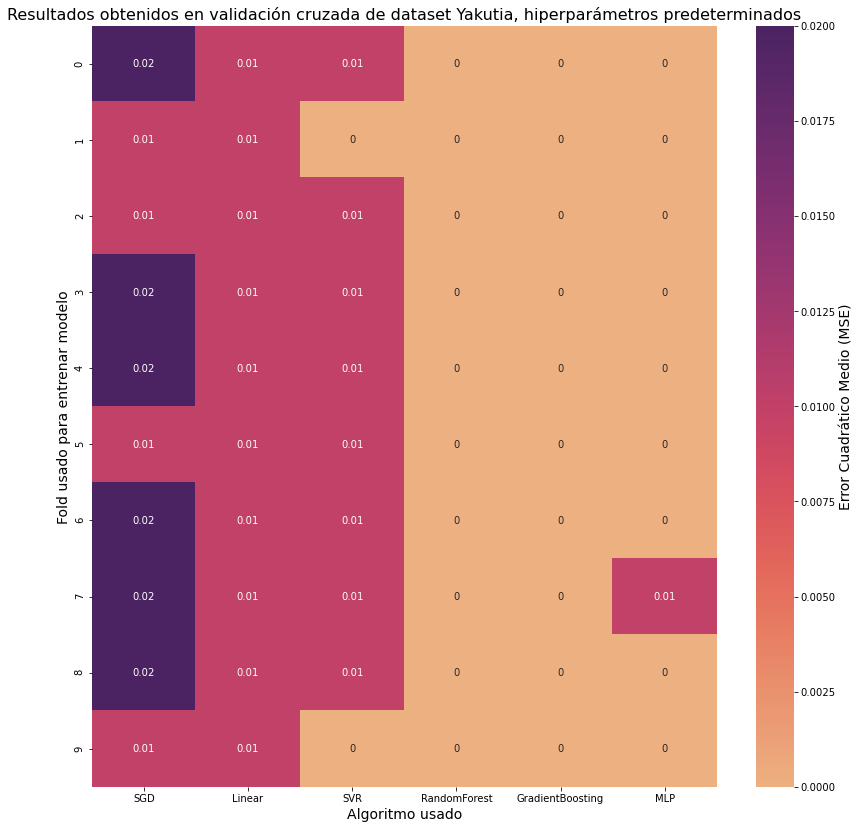

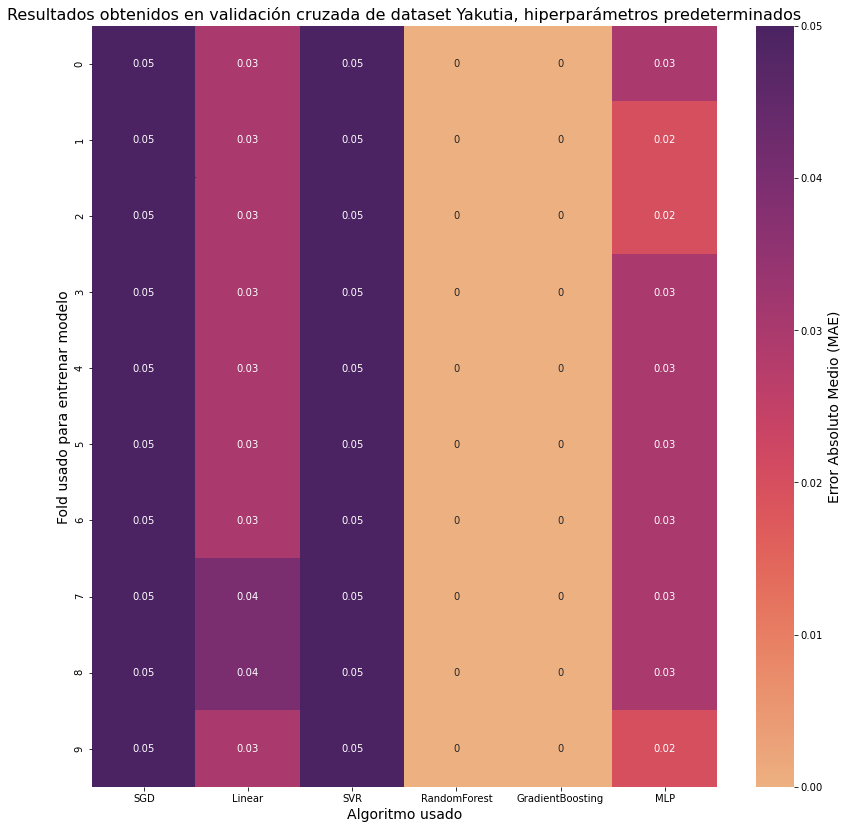

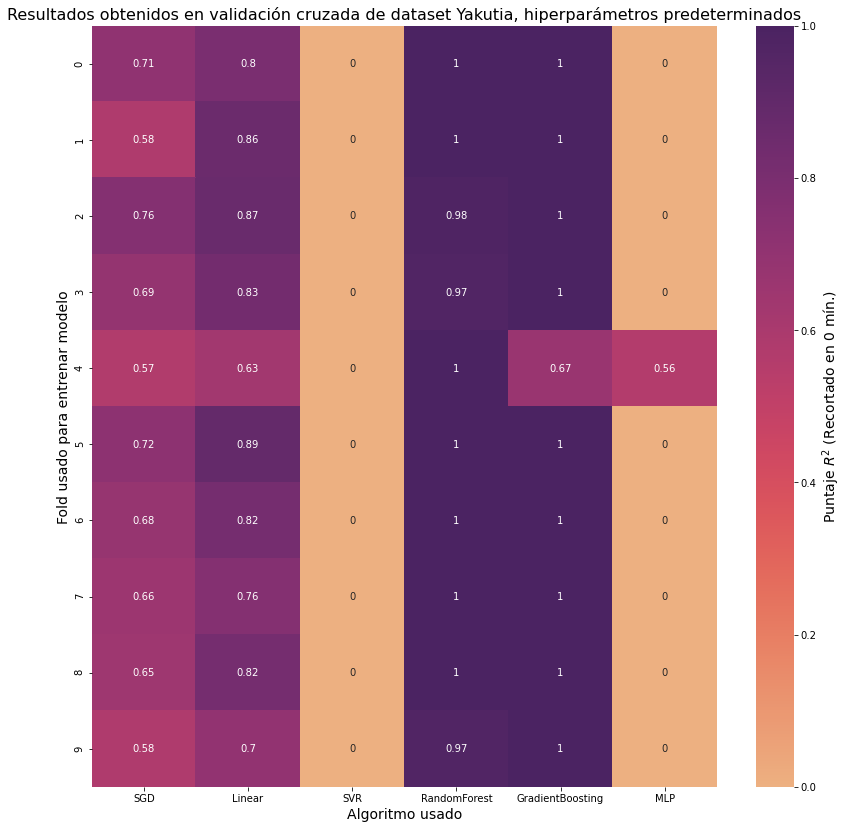

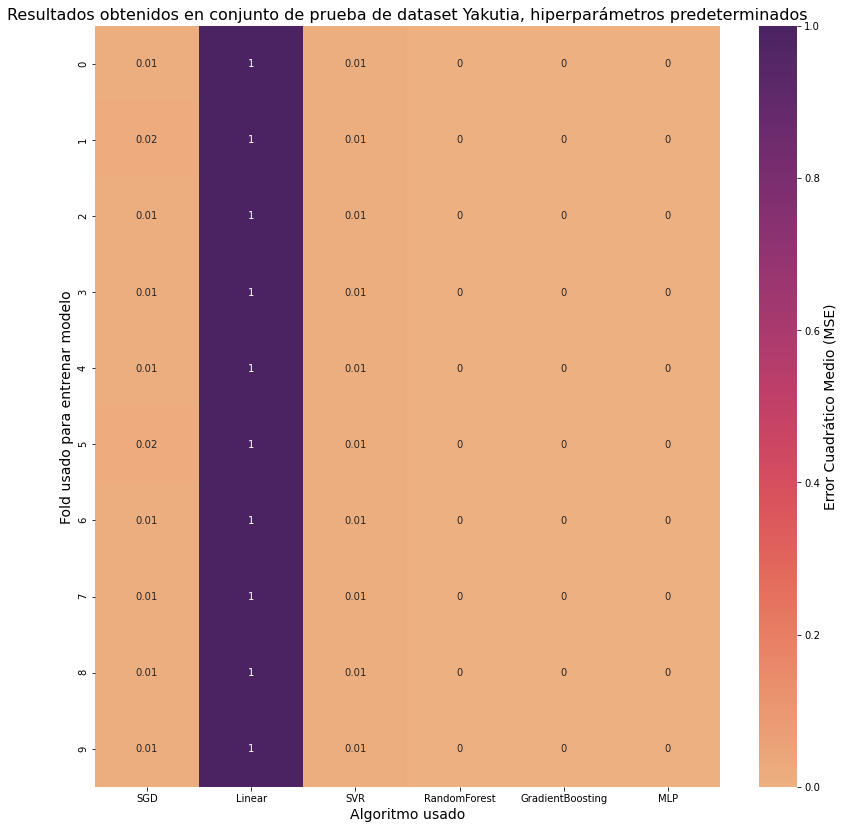

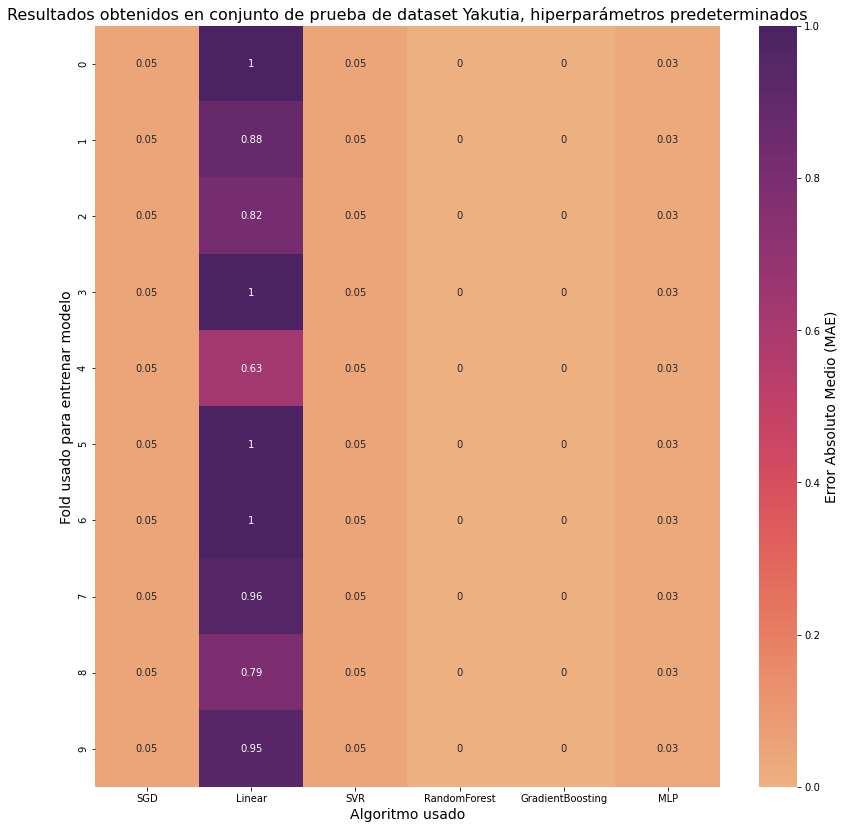

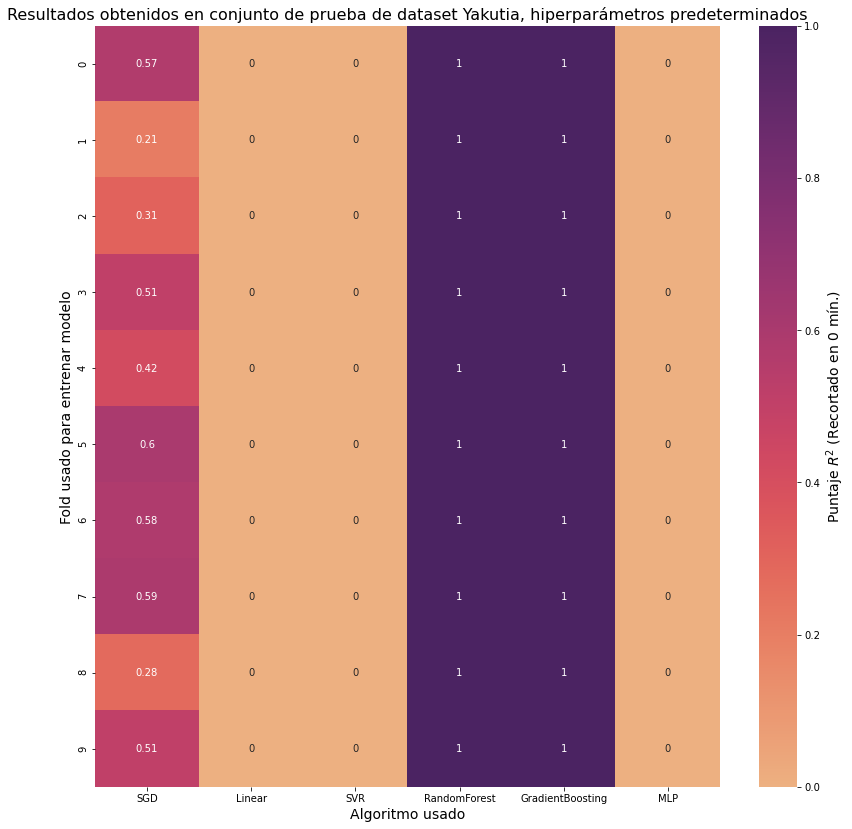

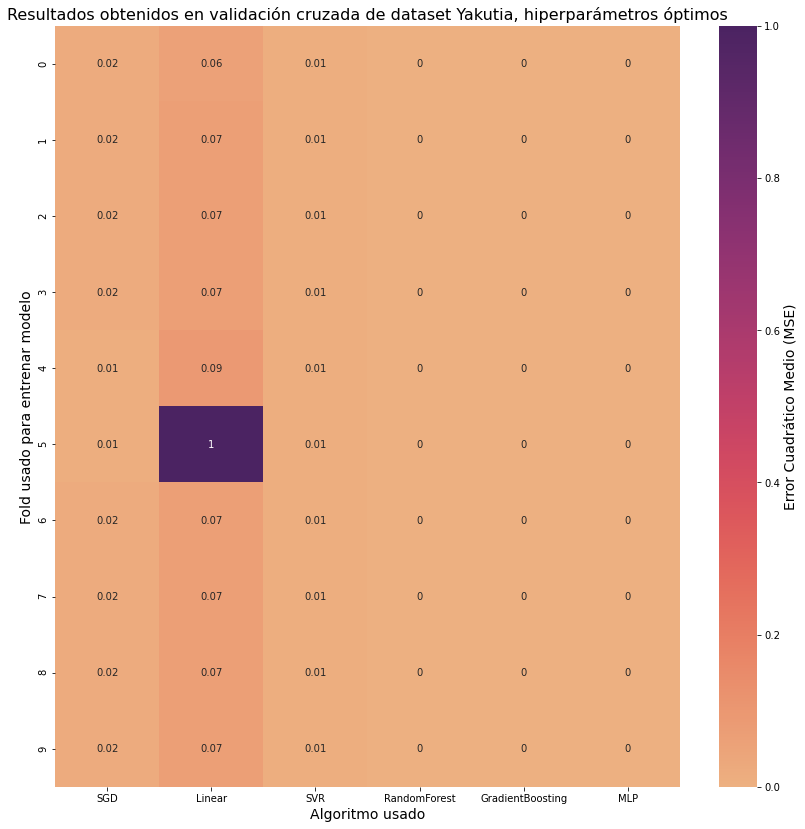

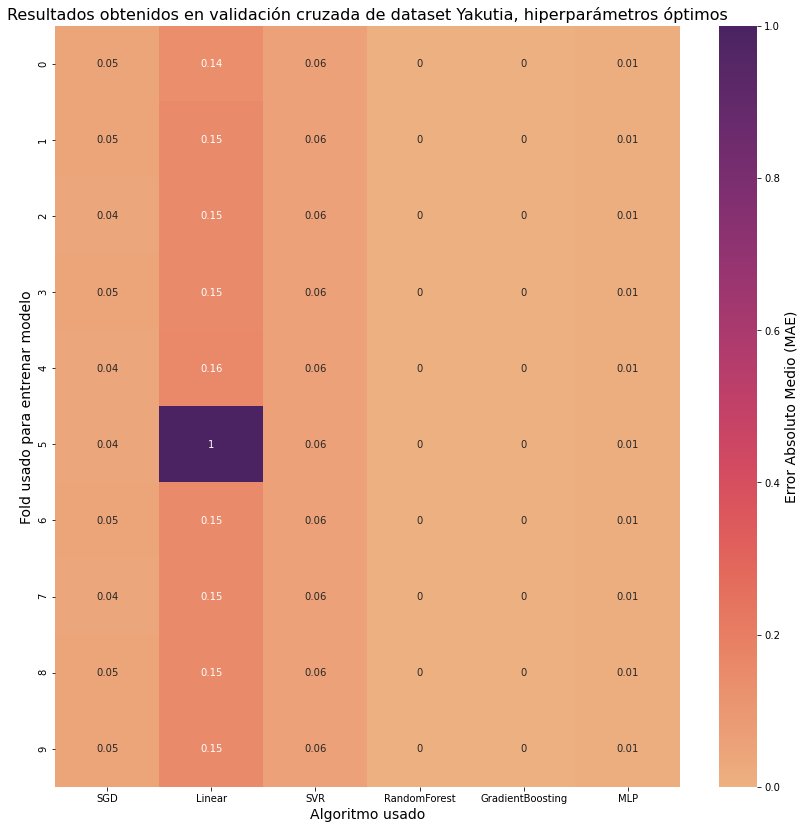

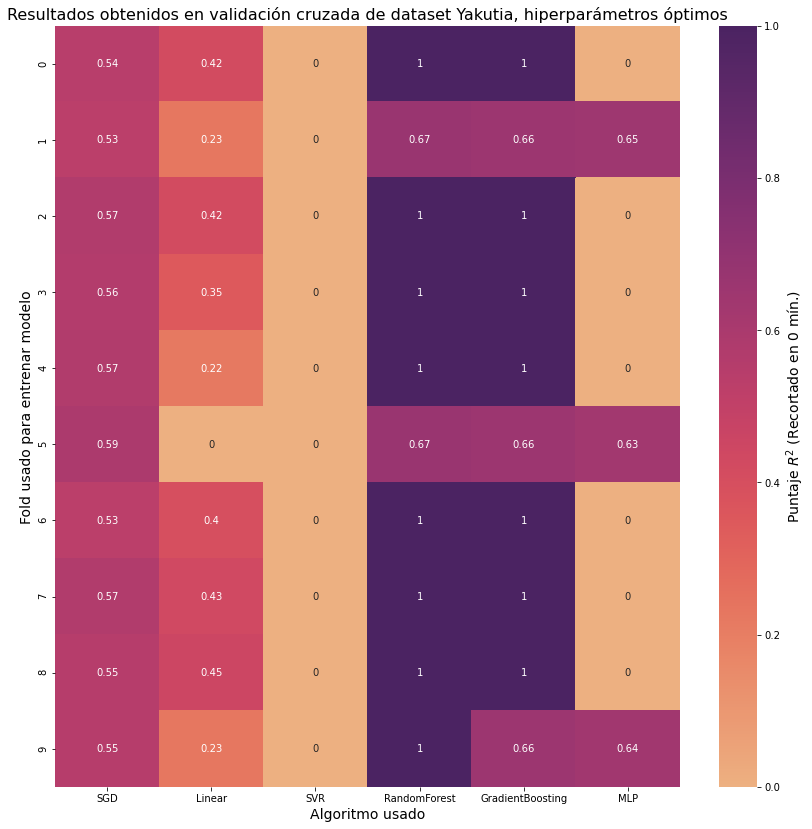

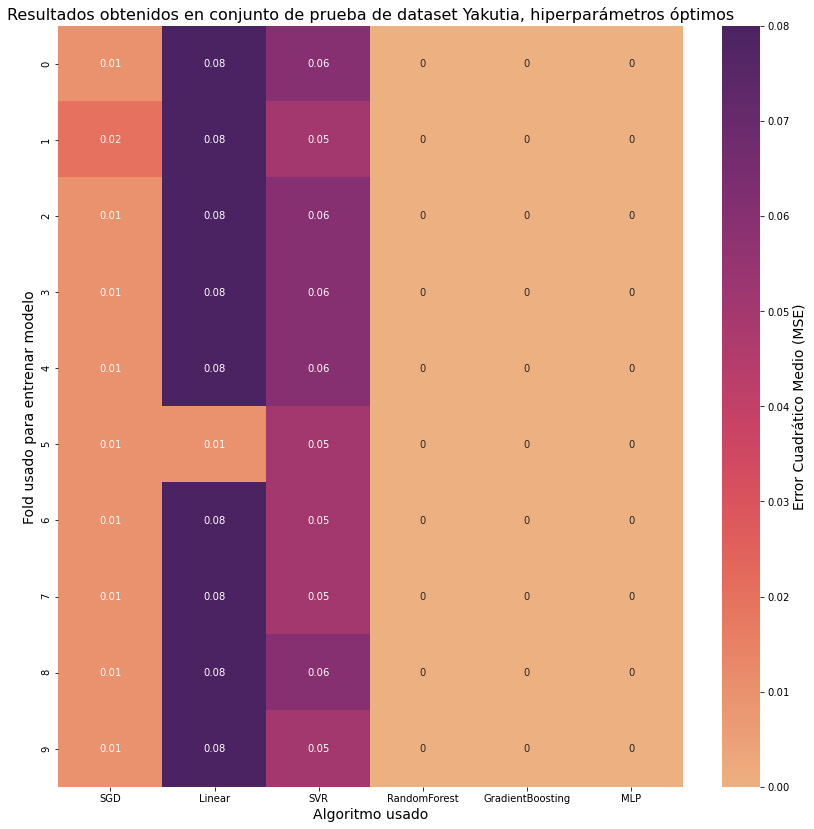

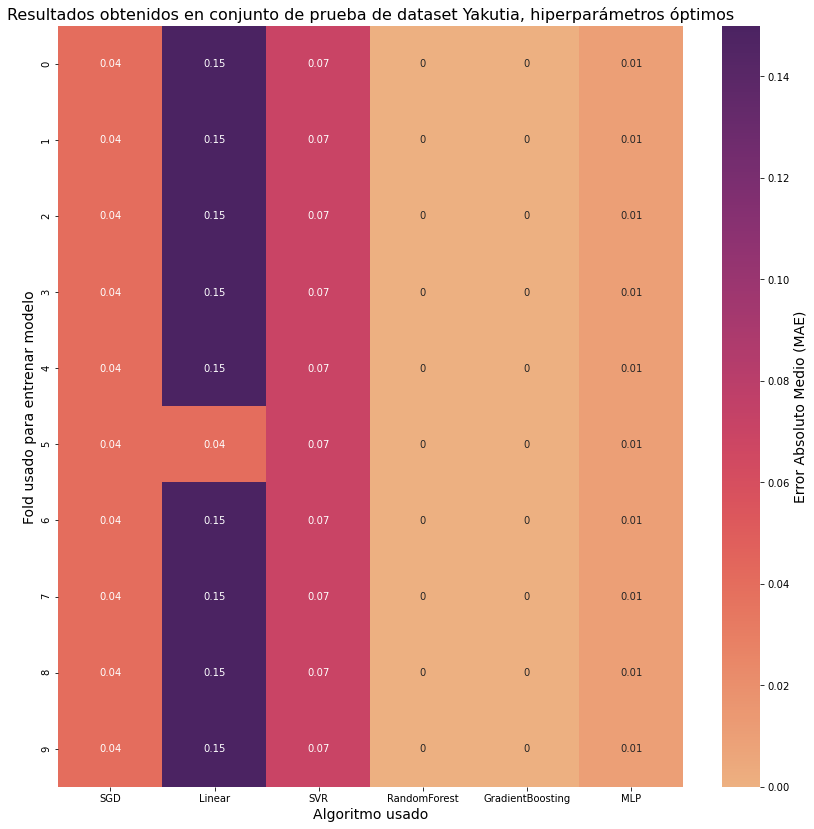

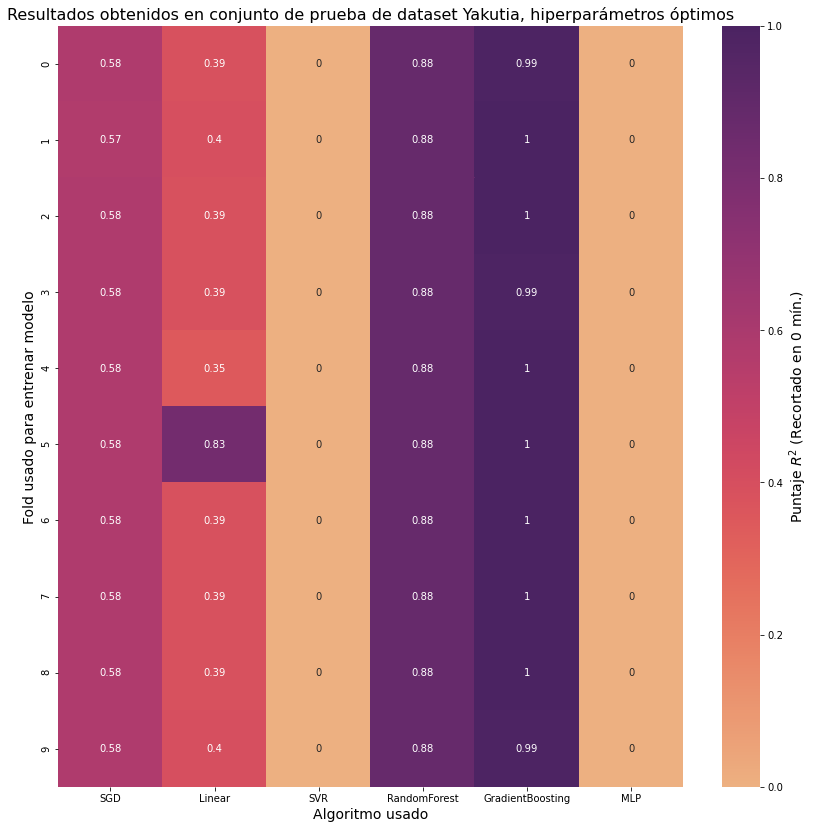

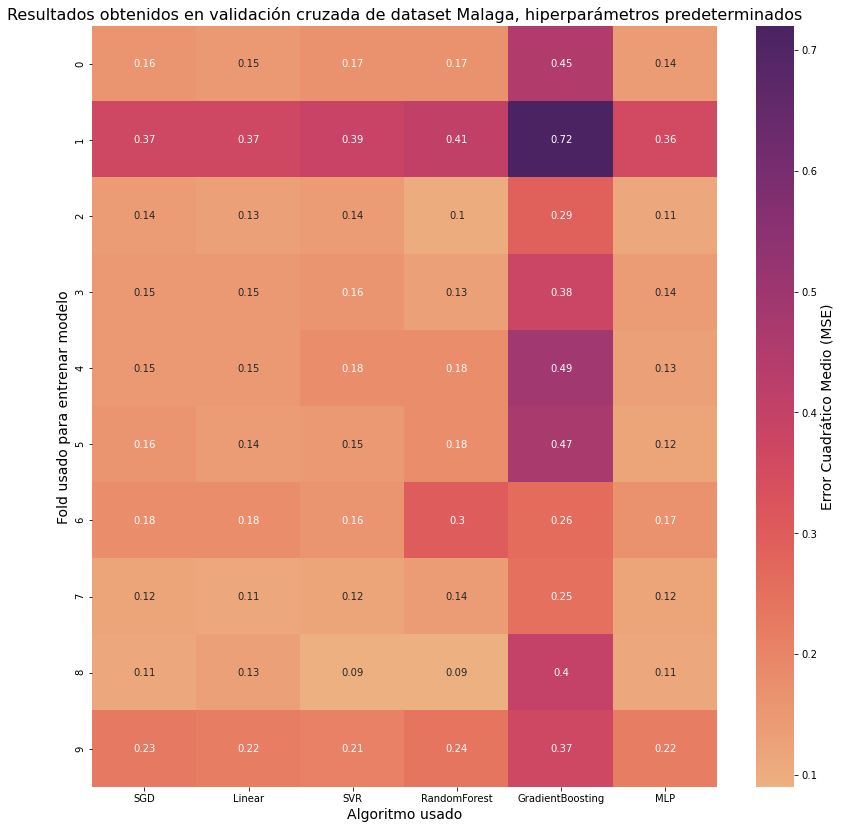

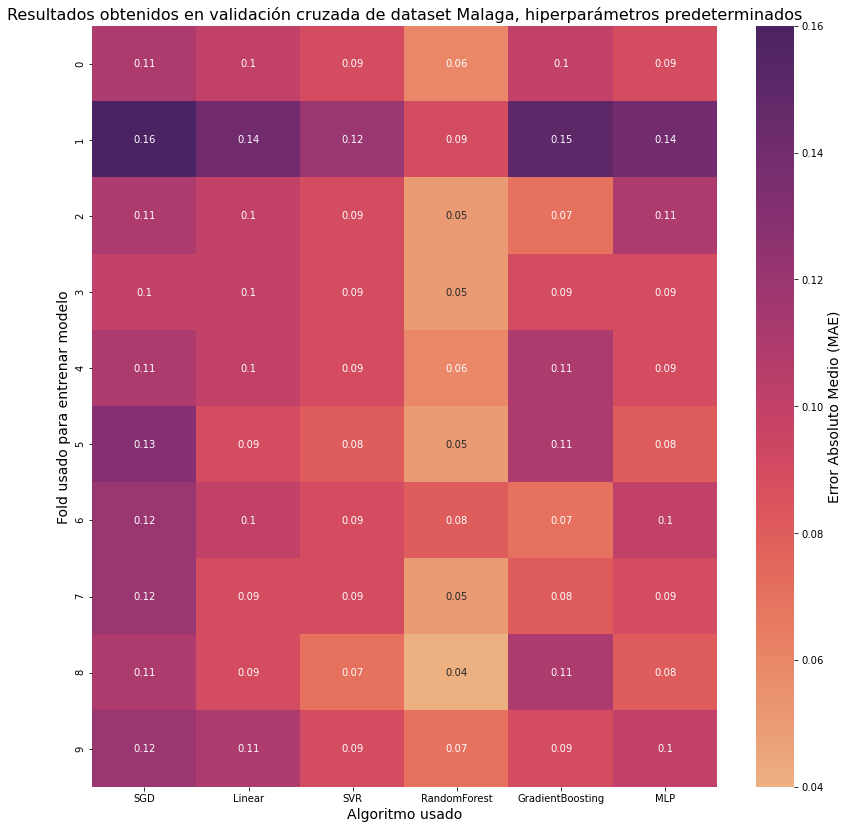

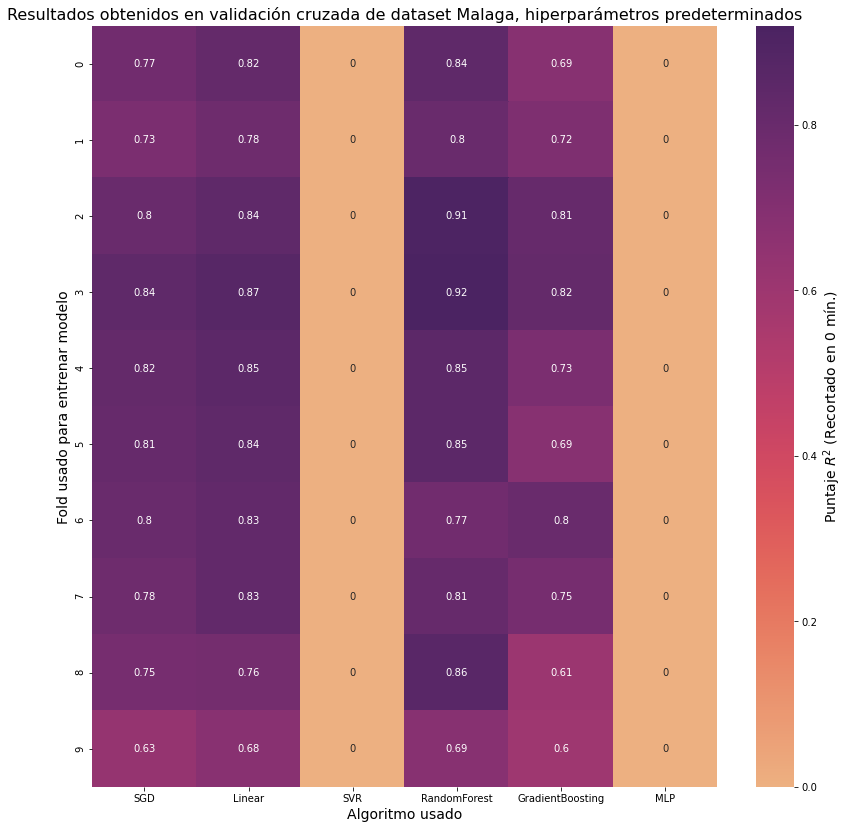

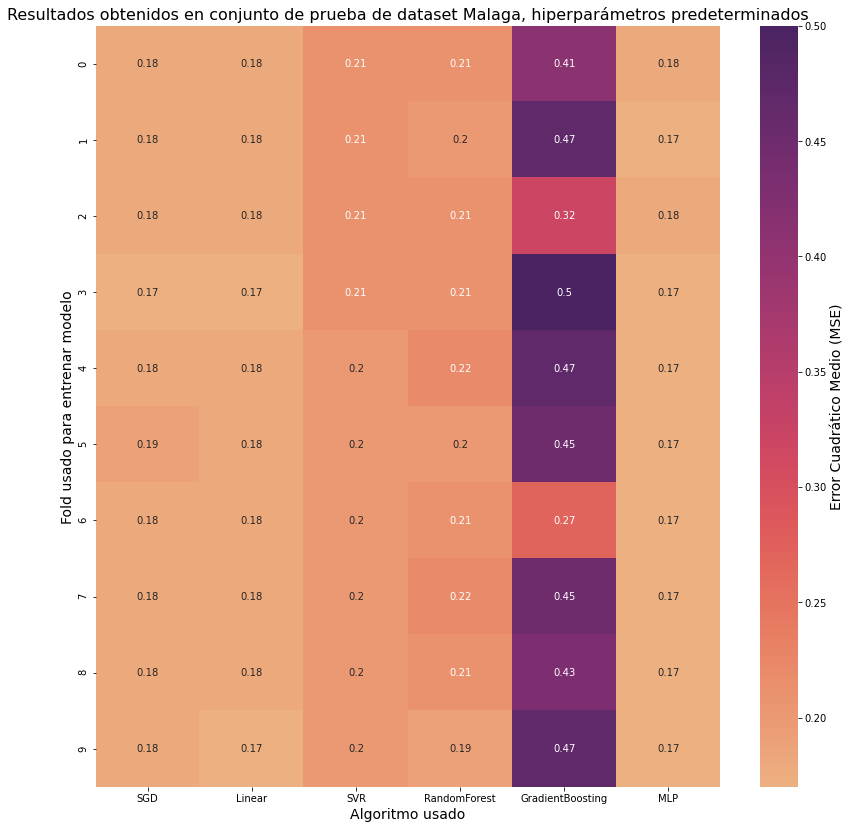

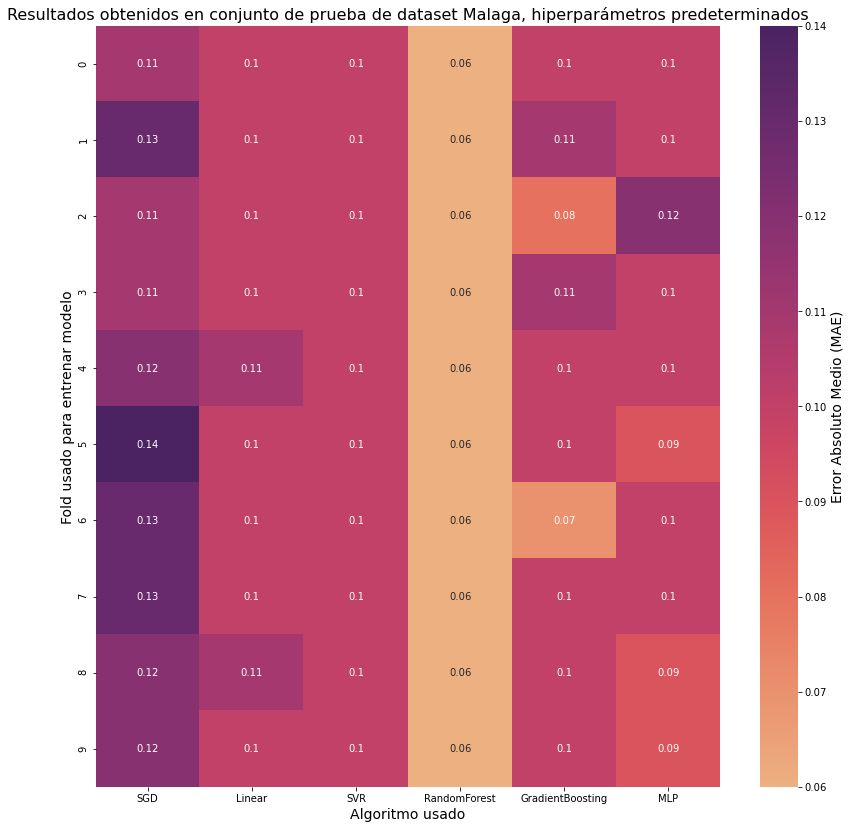

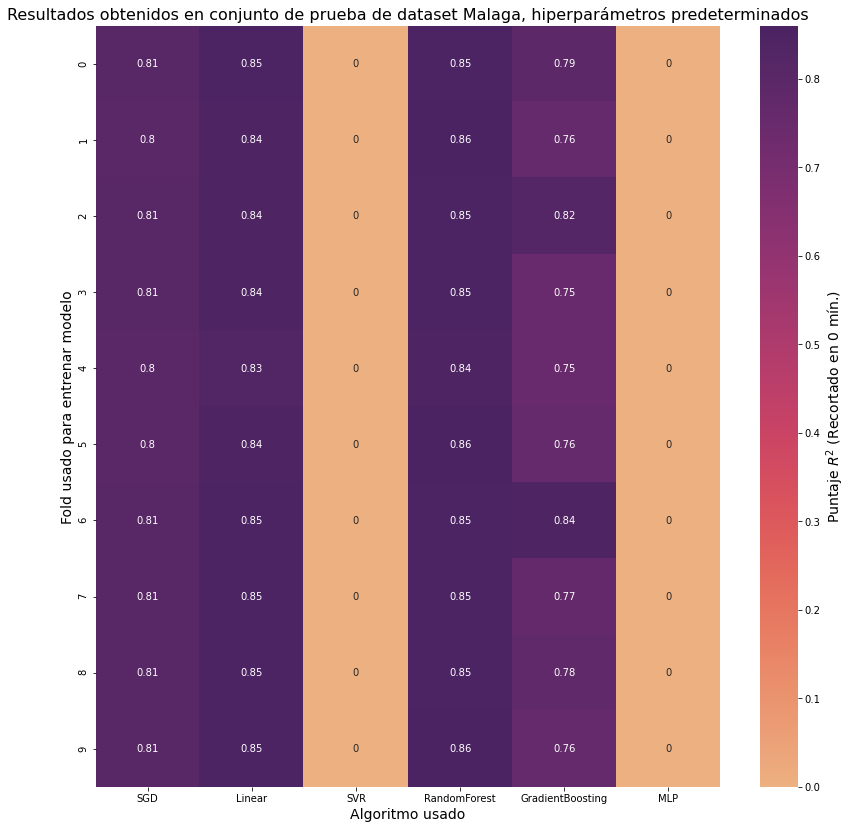

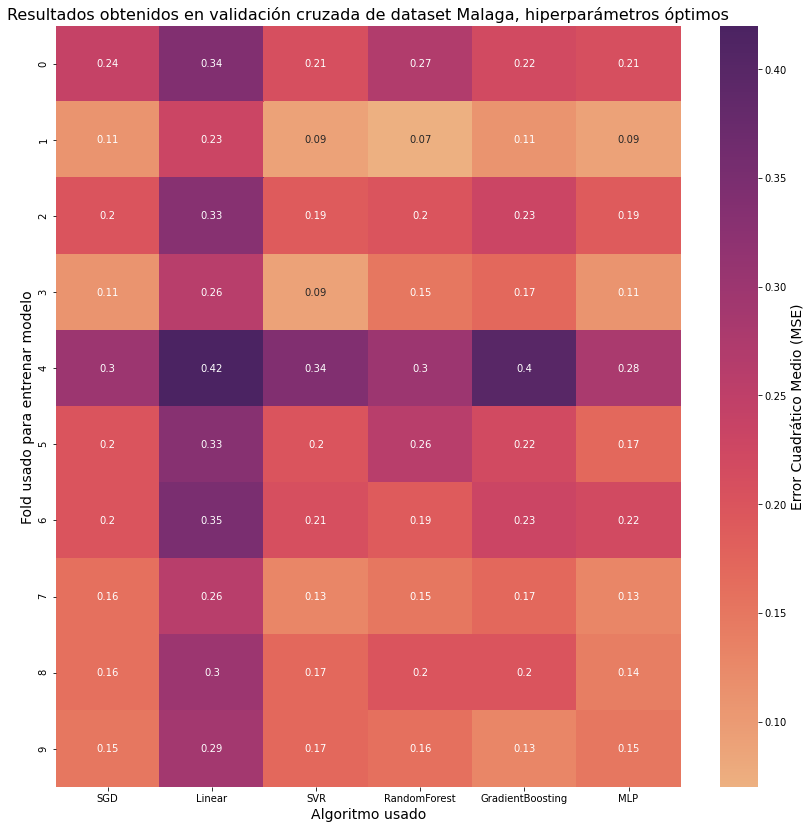

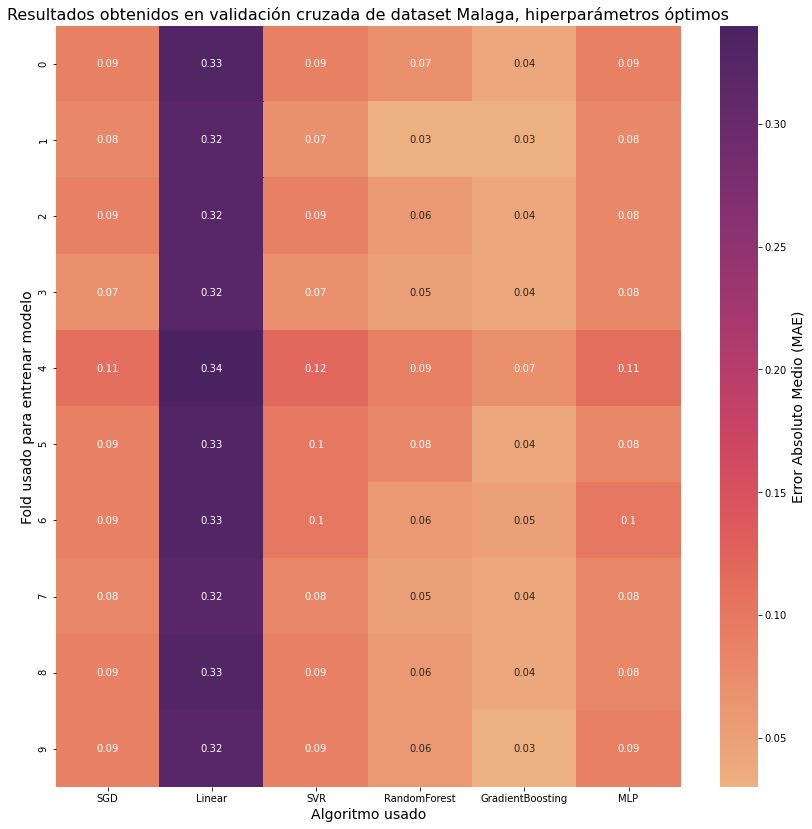

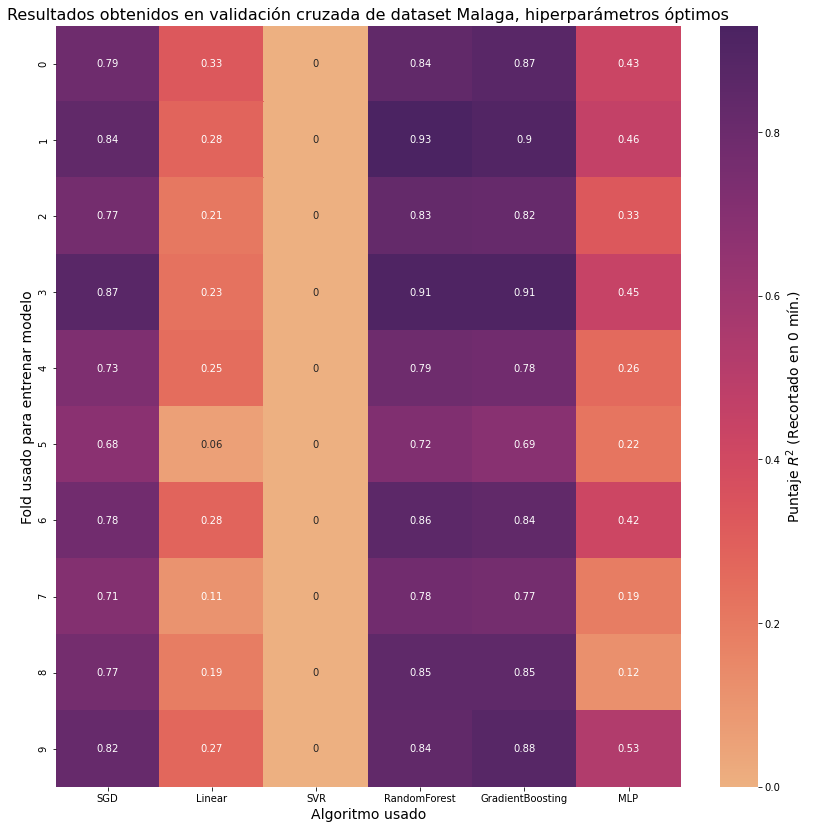

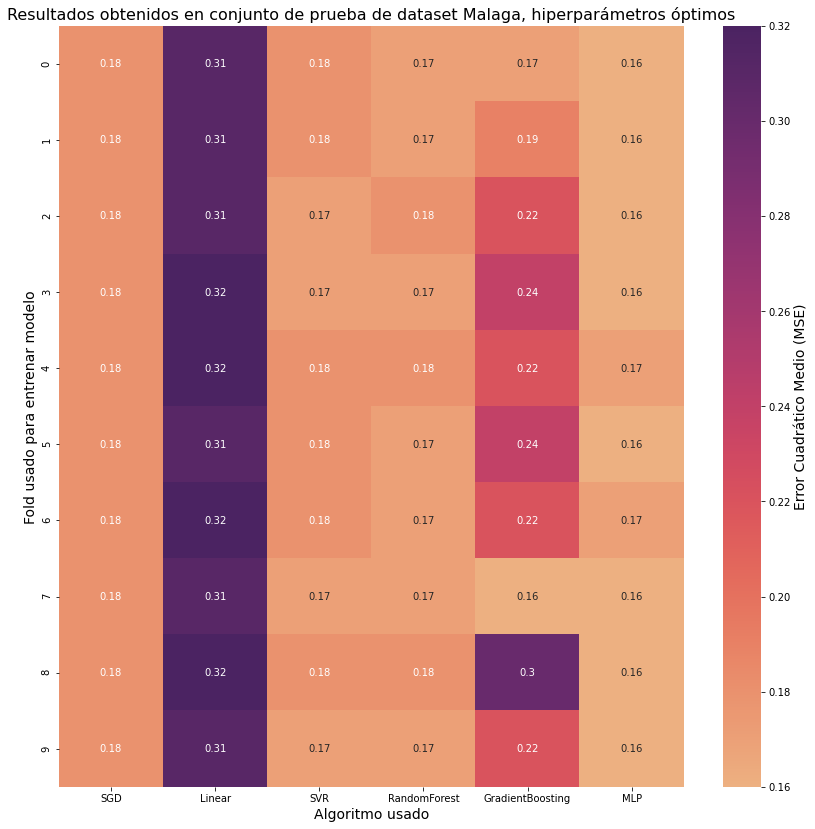

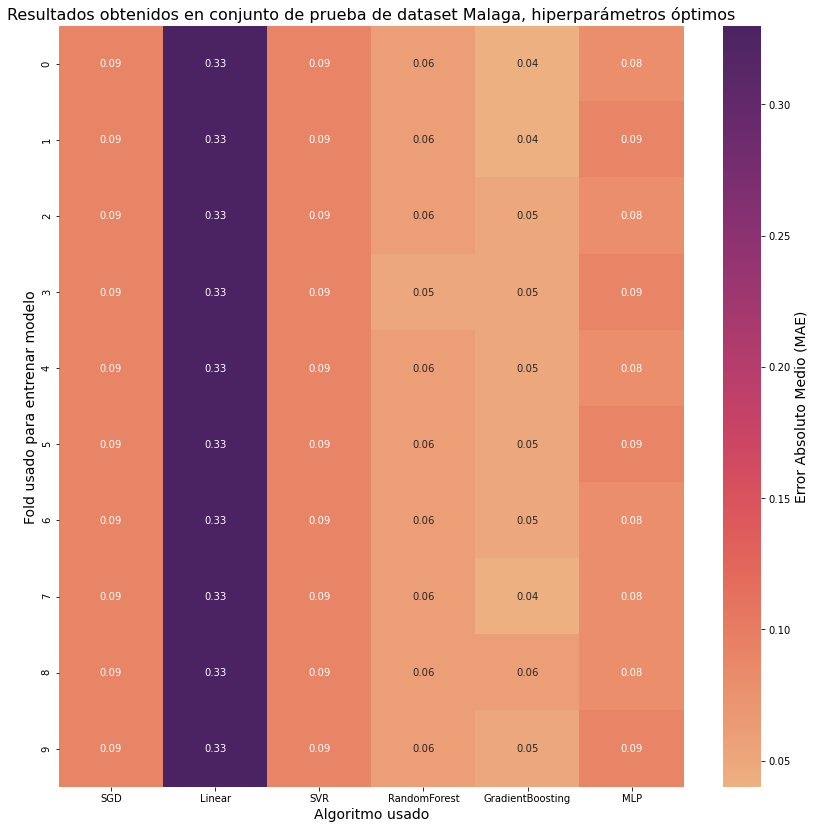

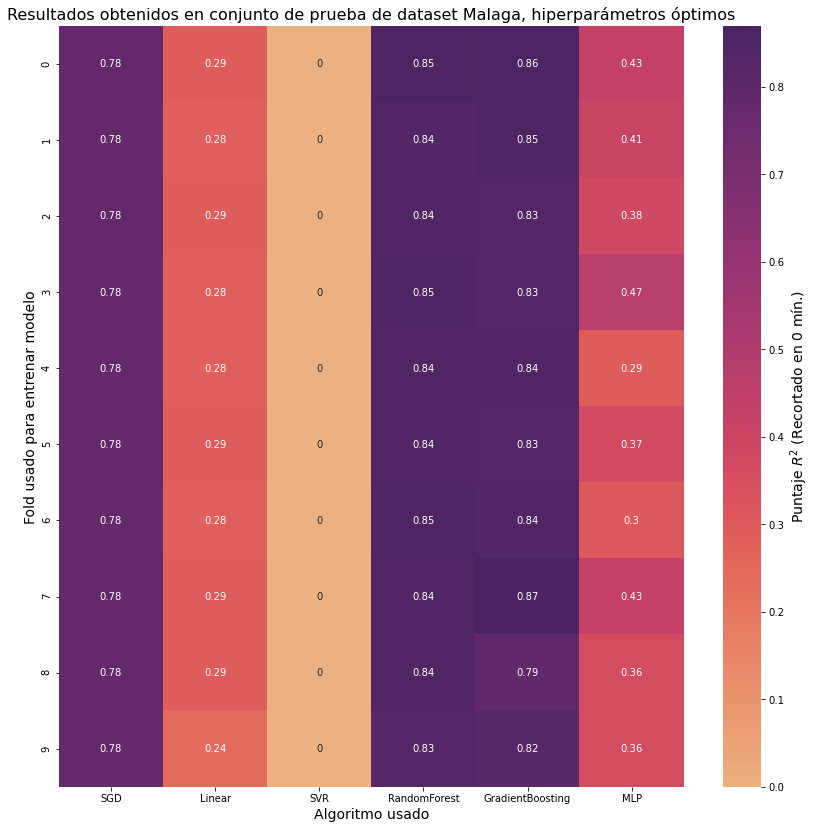

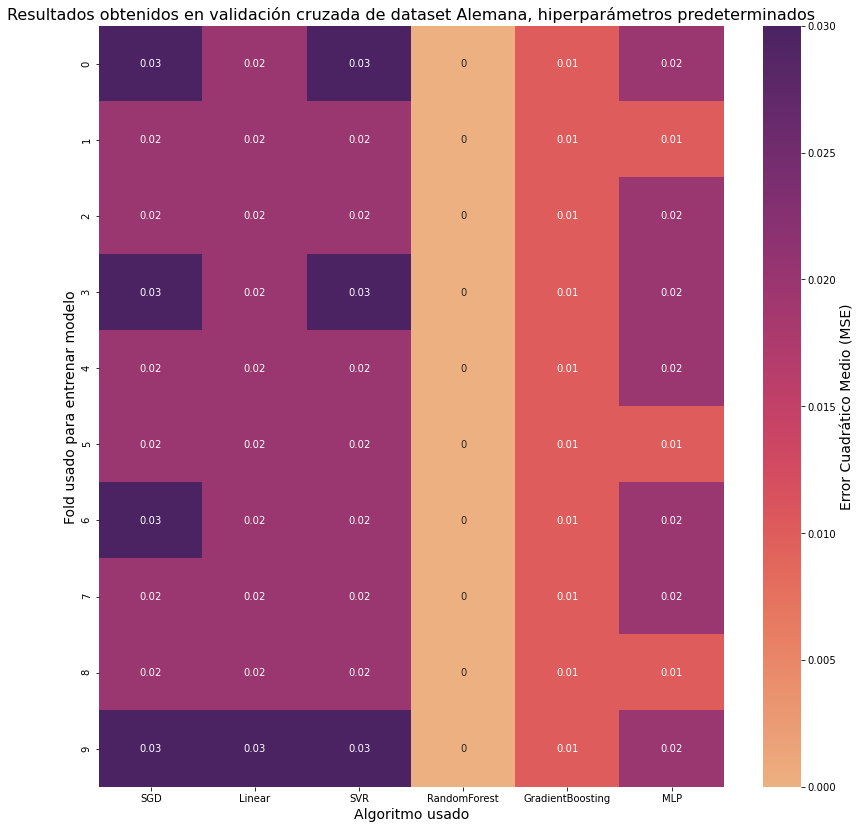

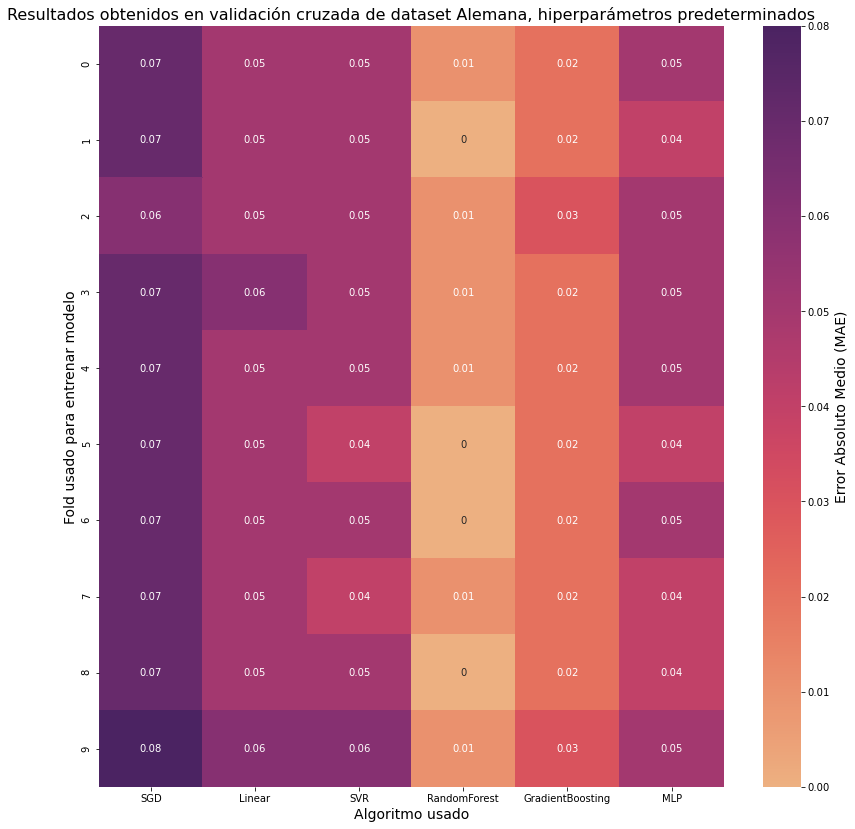

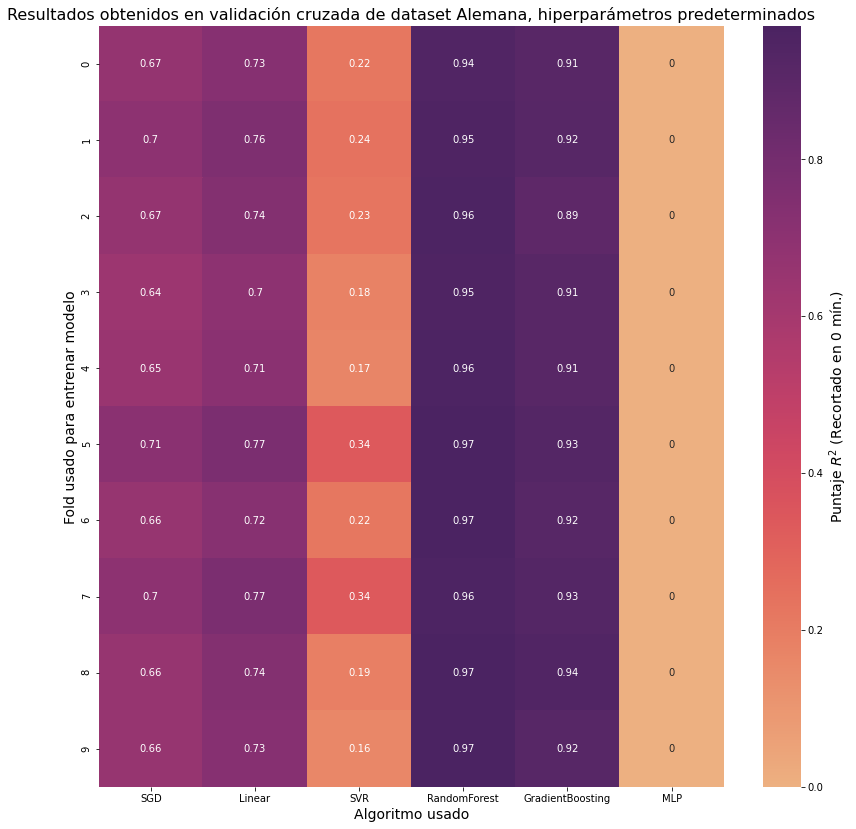

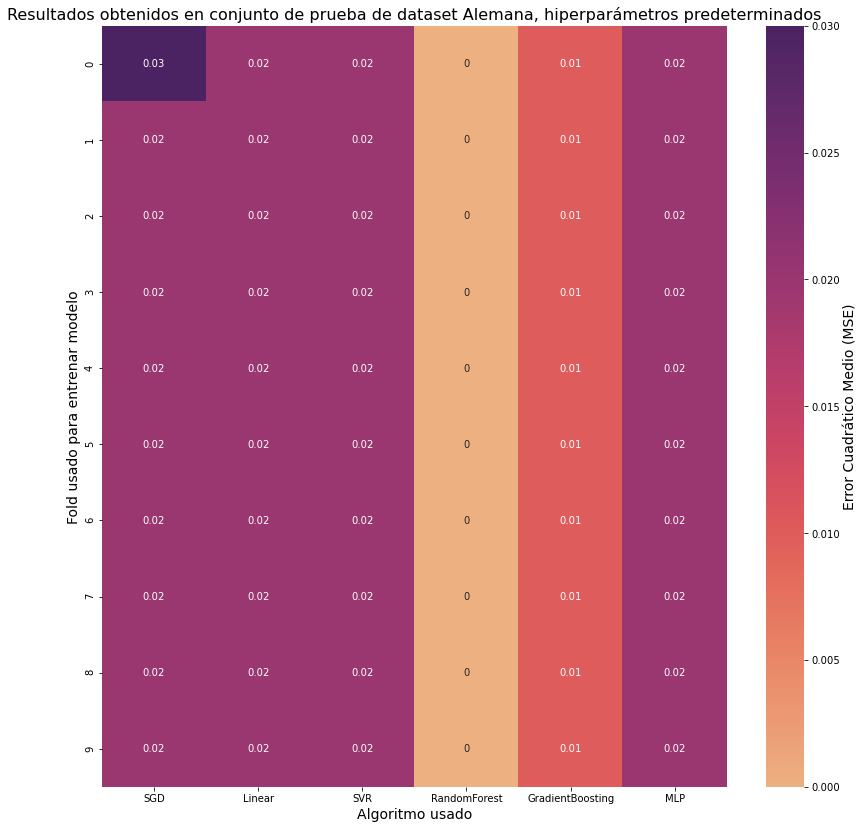

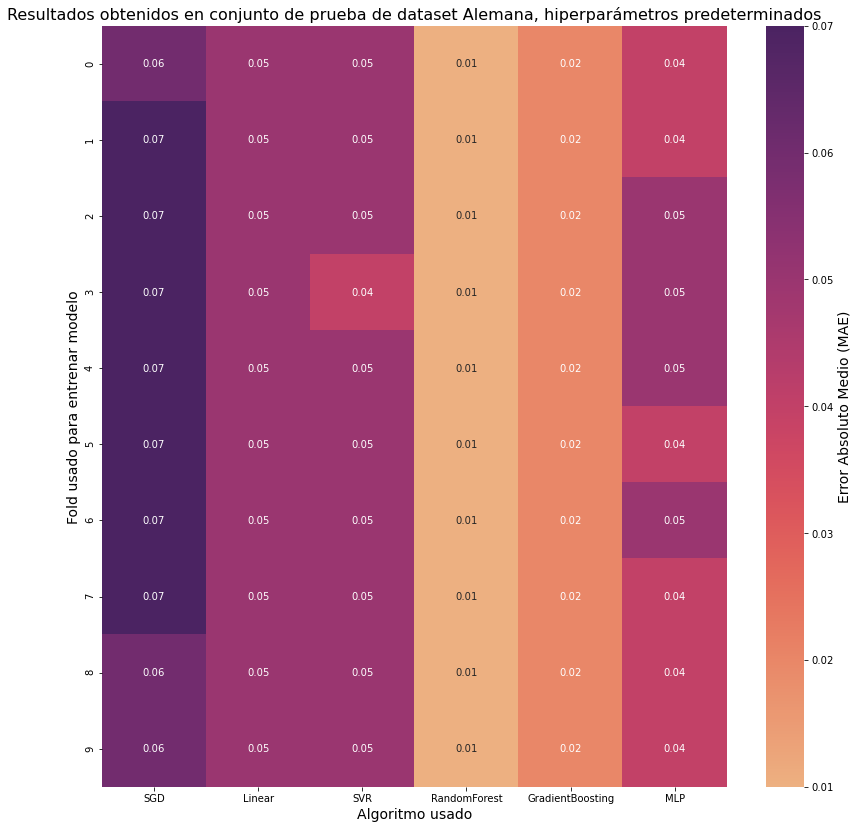

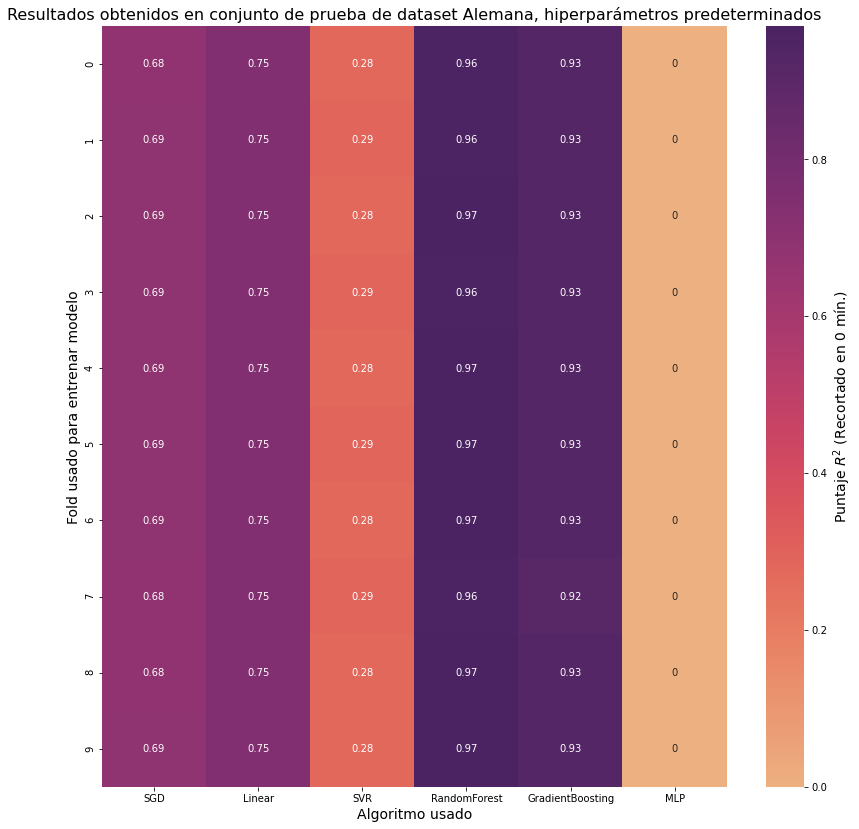

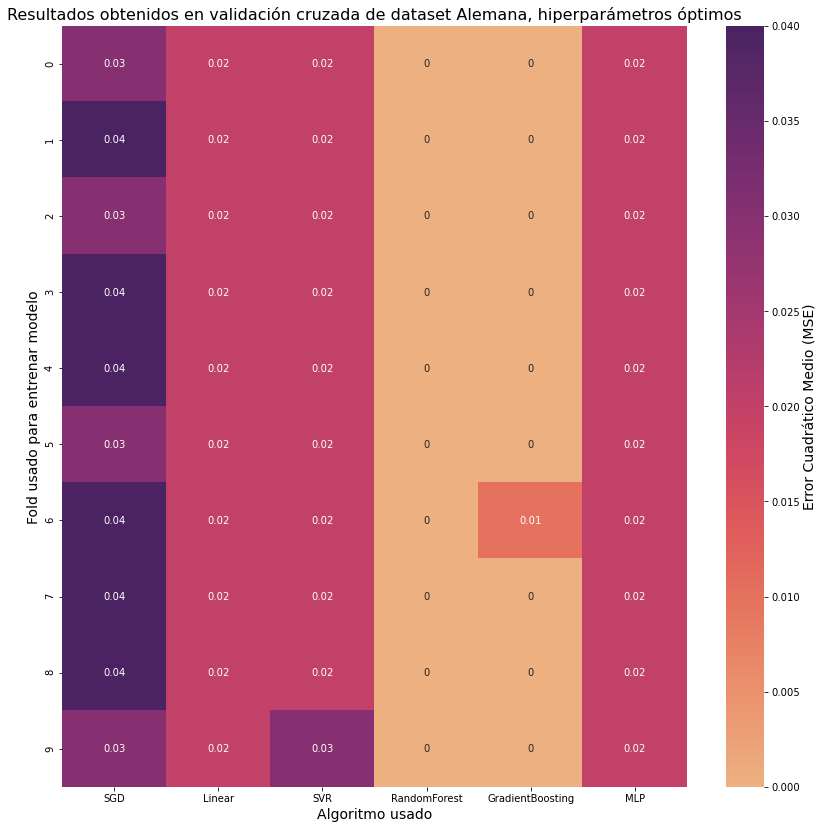

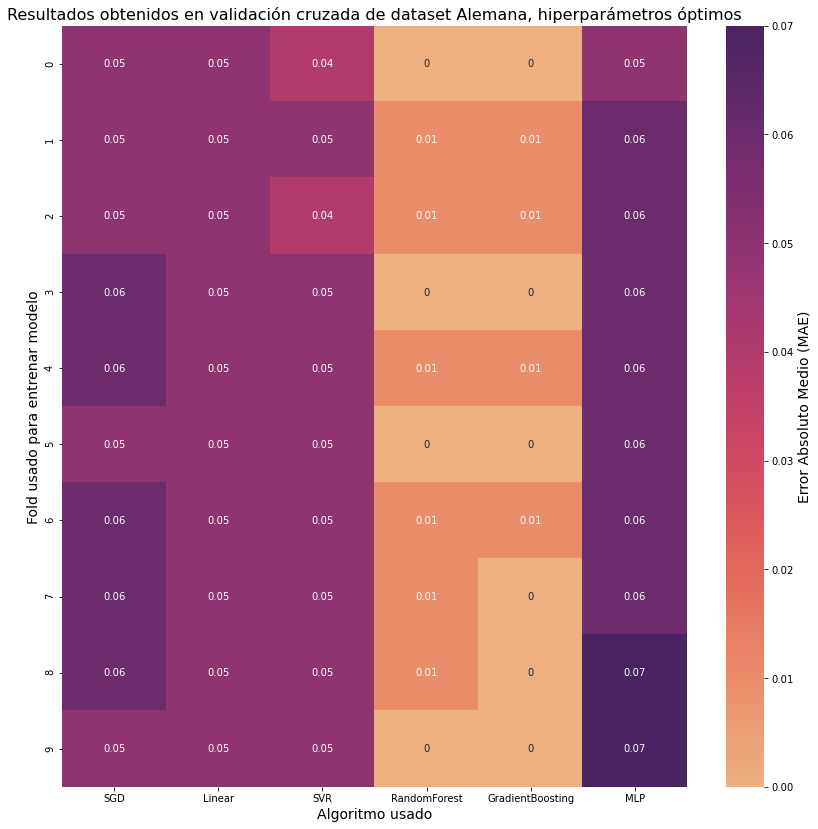

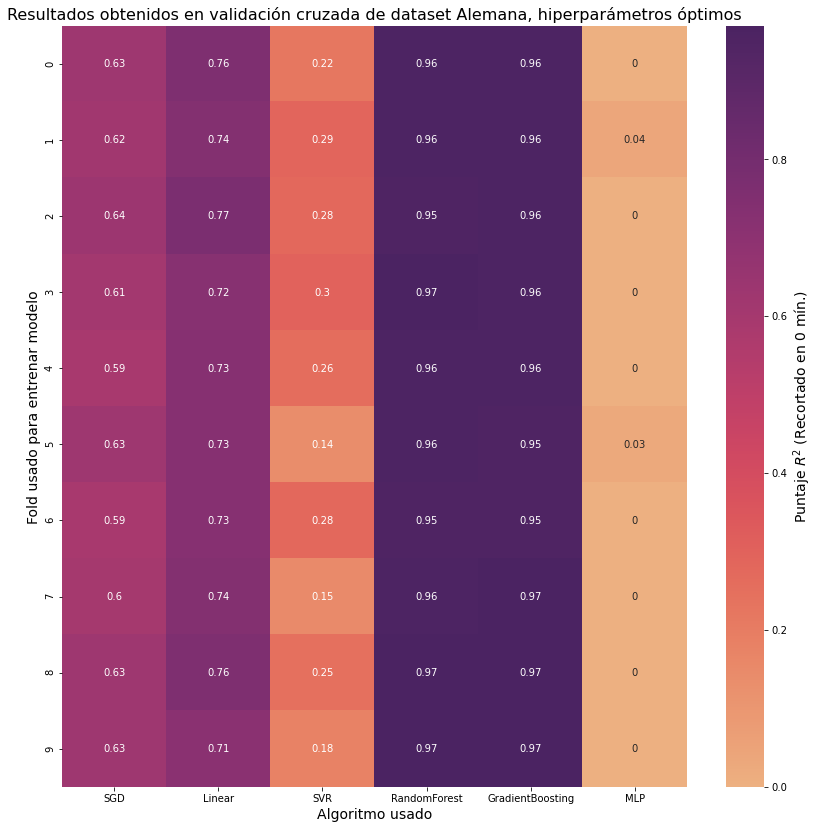

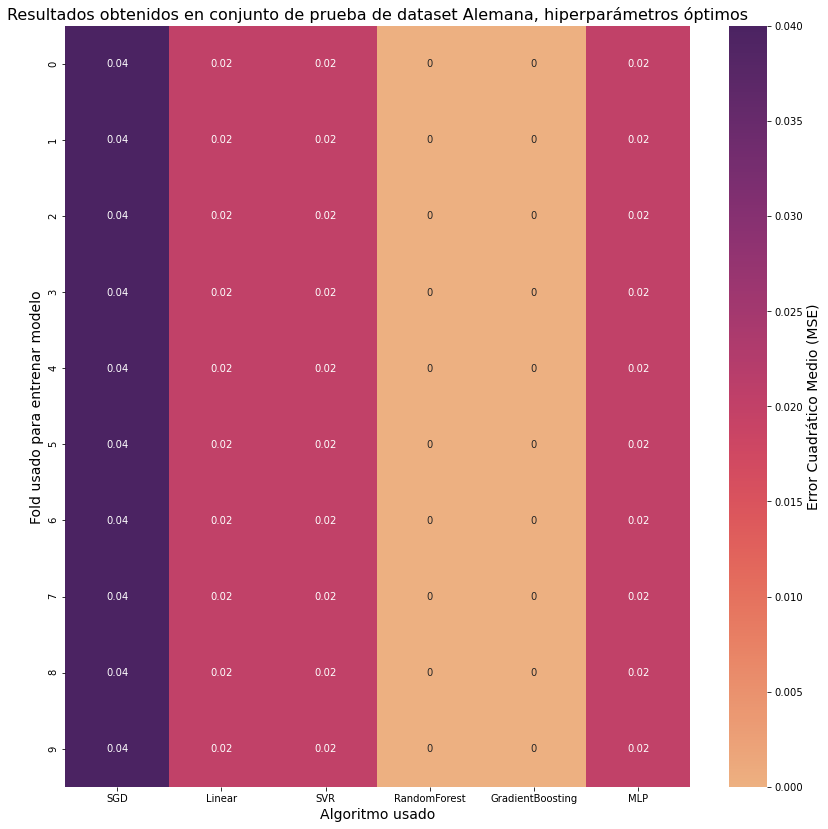

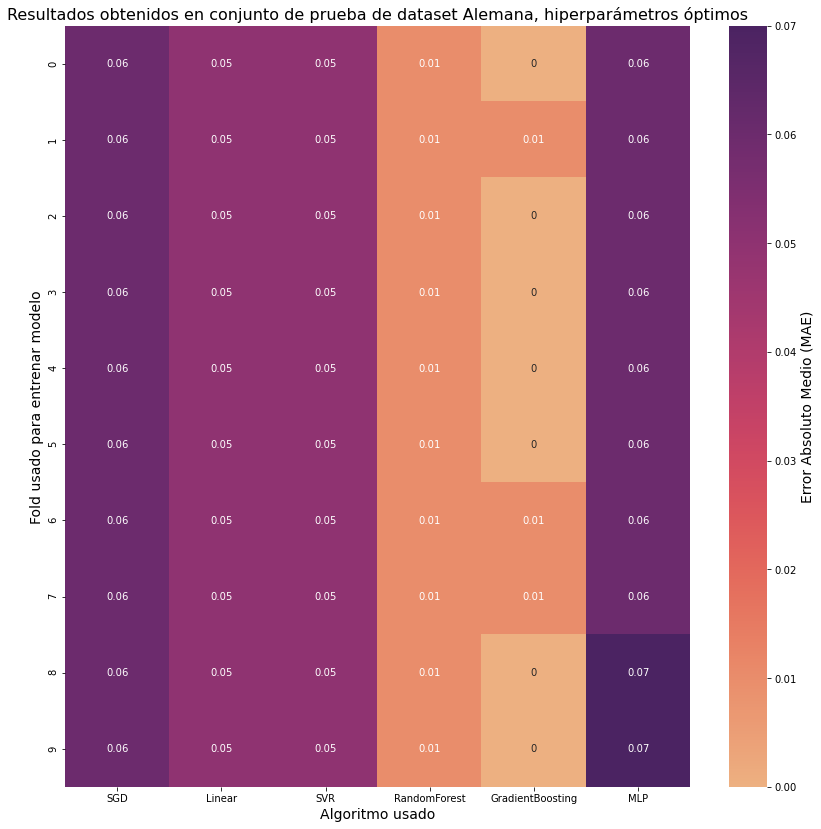

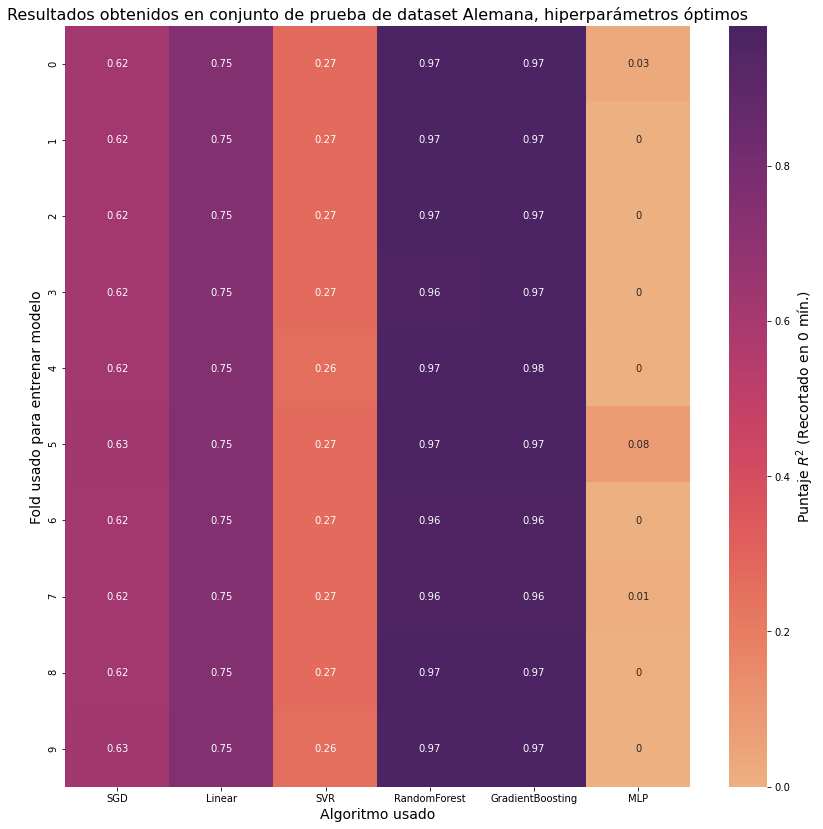

In [7]:
for dataset in dataset_names:
    for param in params:
        for test in tests:
            for score in scores:
                draw_graph(dataset, score, test, param)


### Visualización de resultados obtenidos en cada dataset, por cada conjunto de datos, por cada métrica

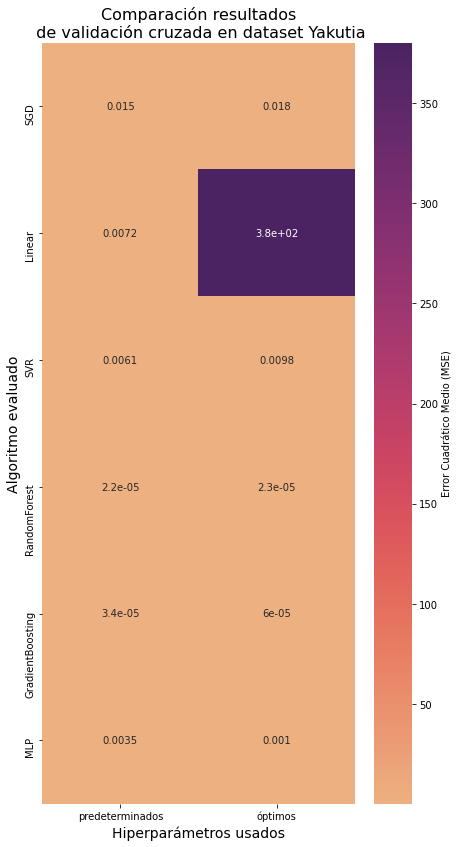

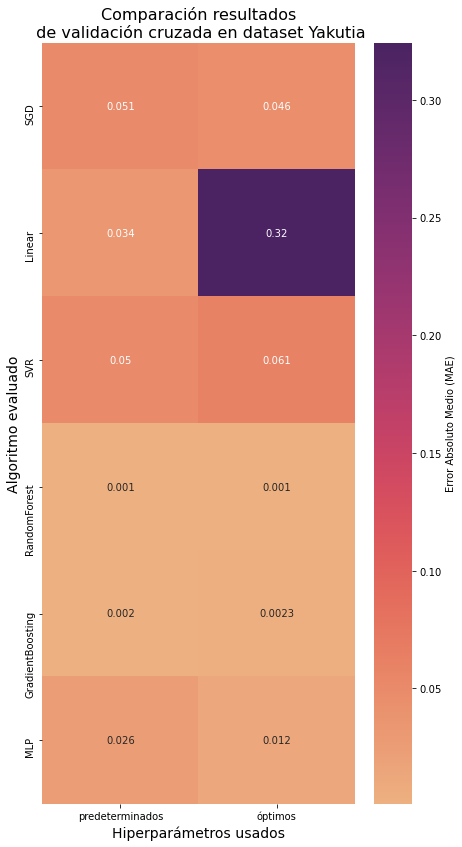

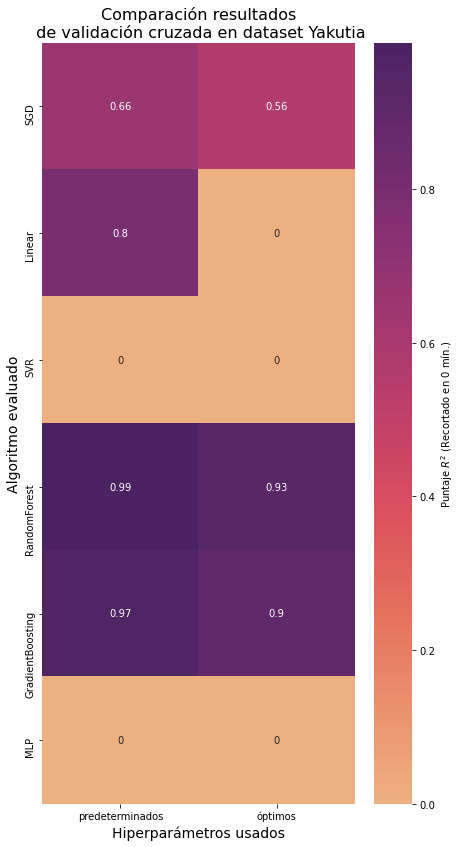

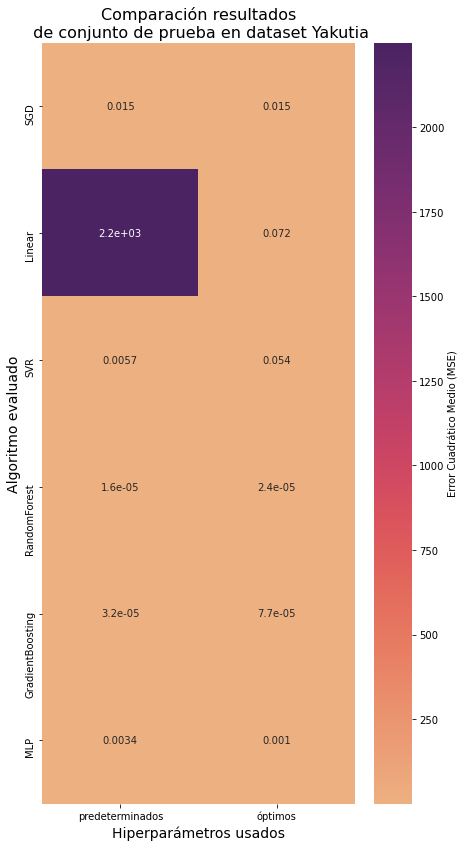

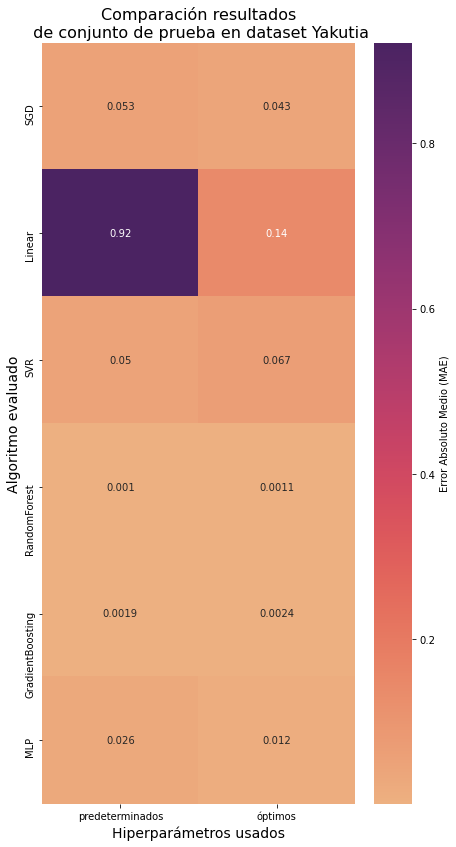

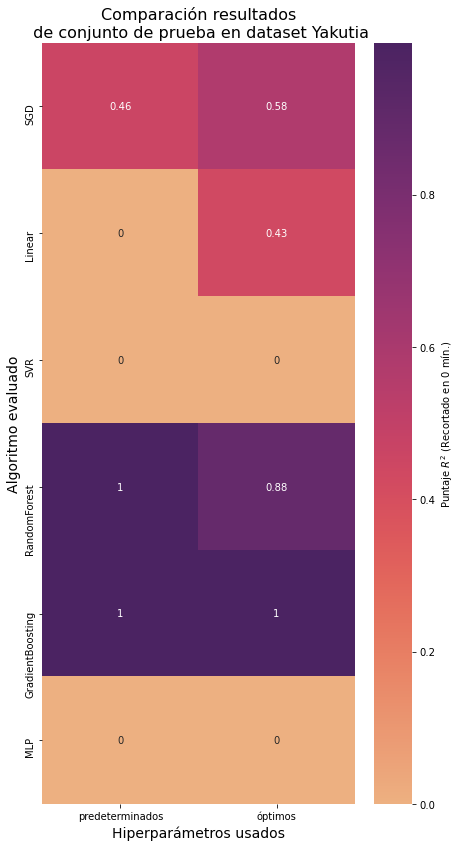

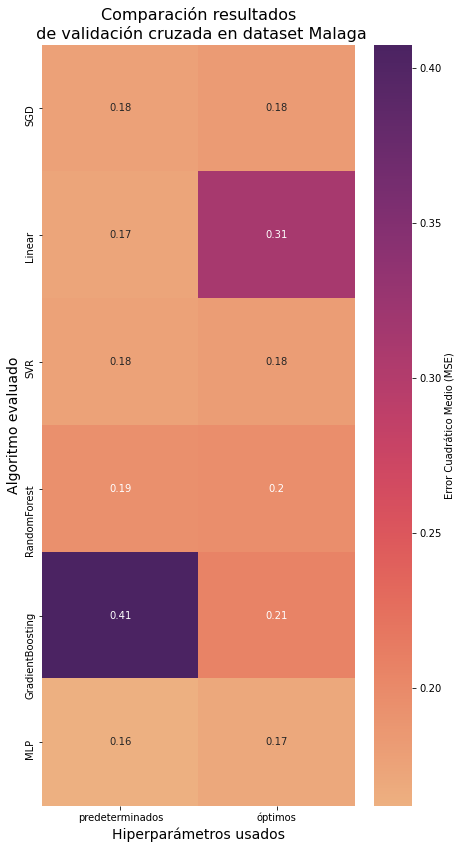

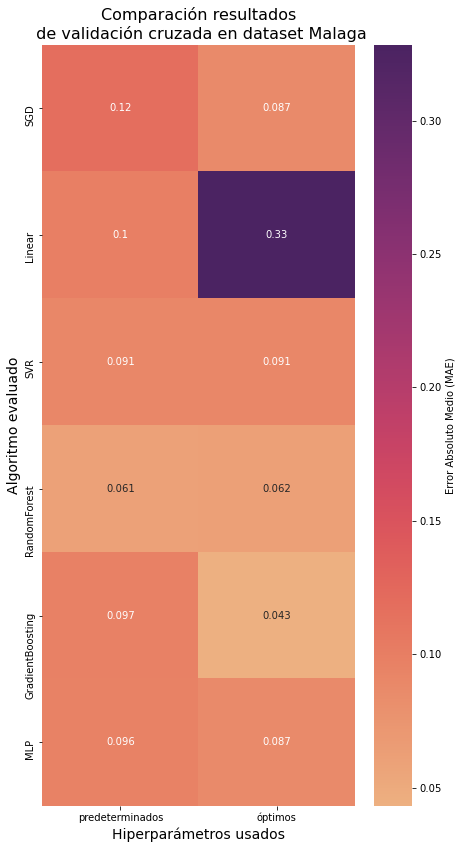

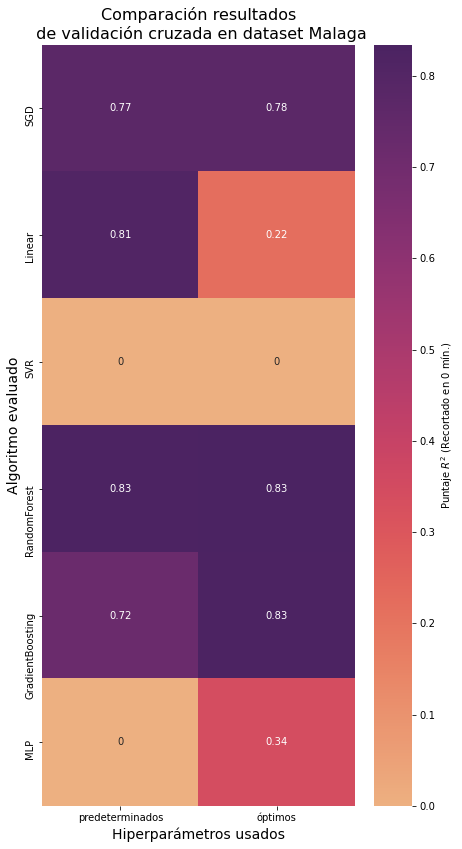

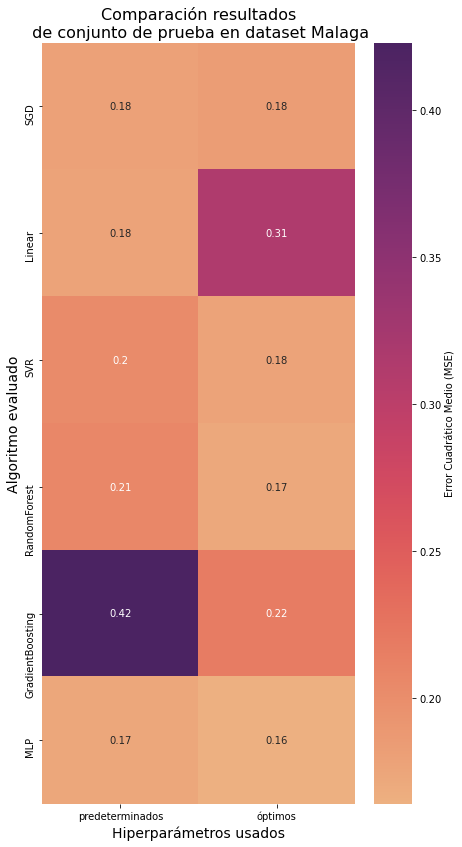

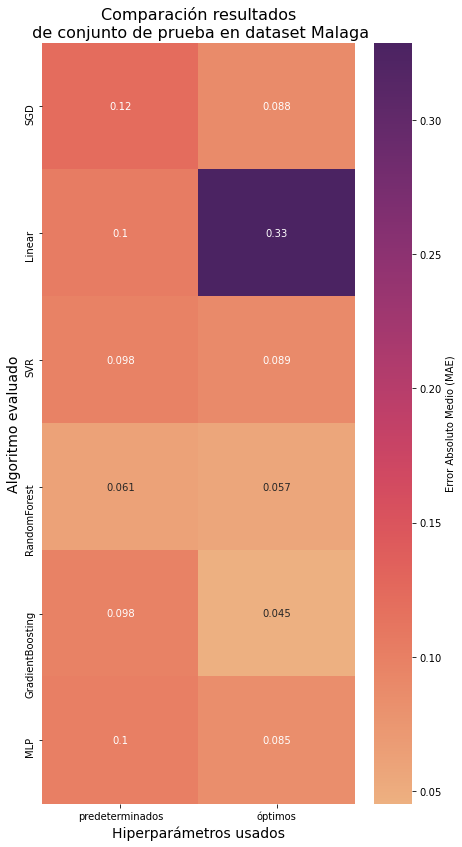

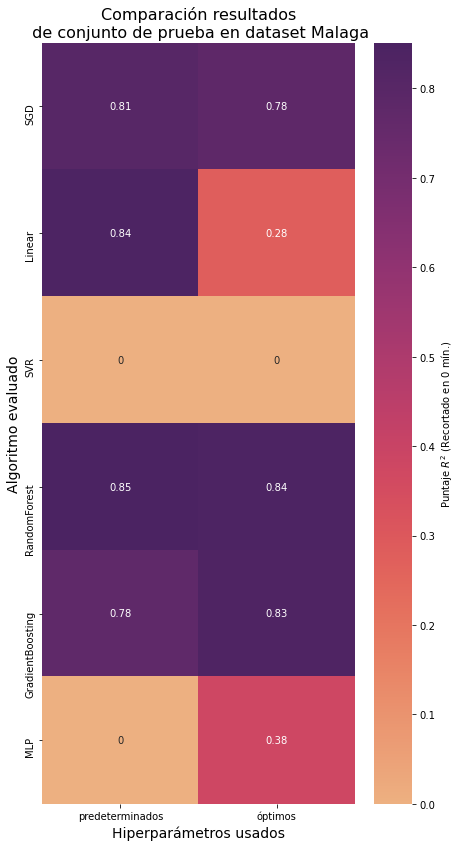

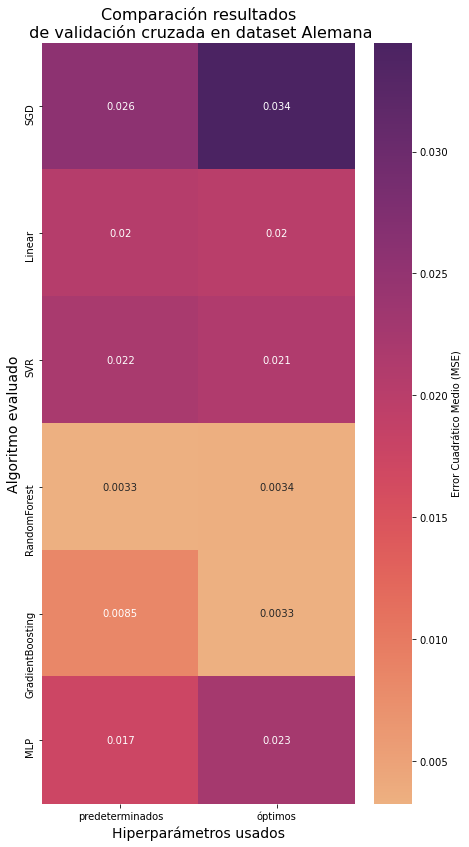

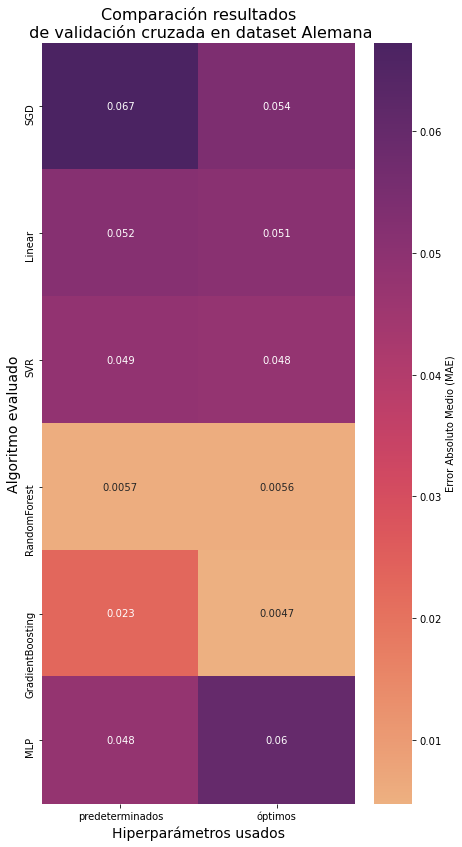

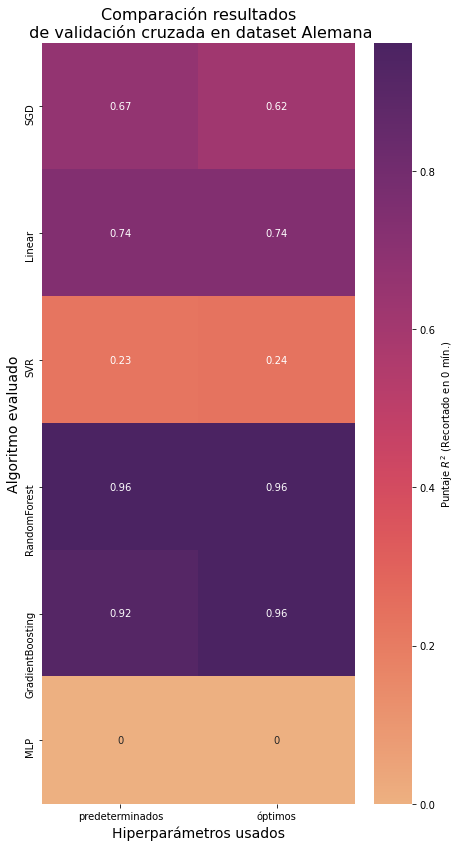

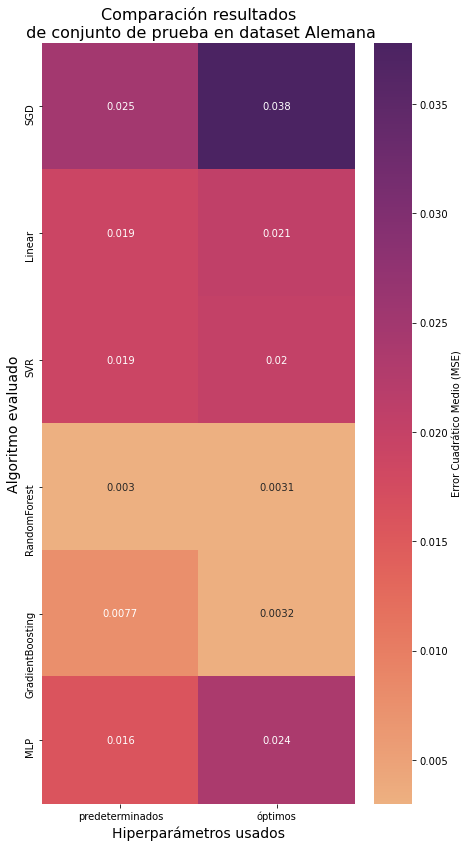

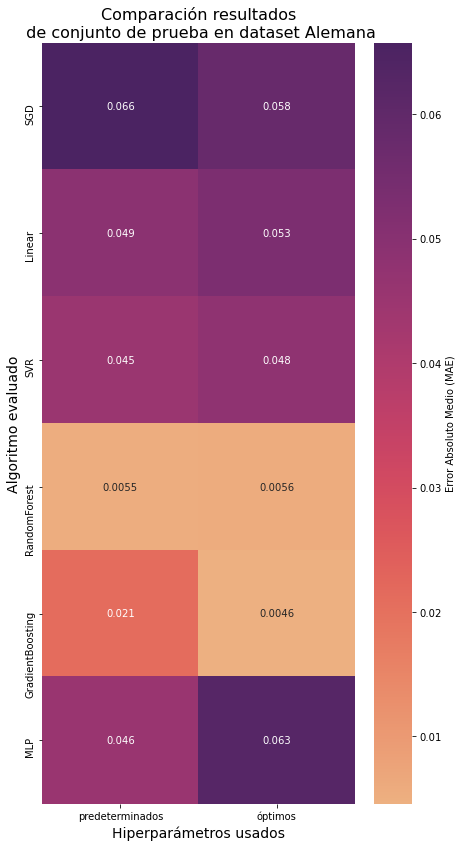

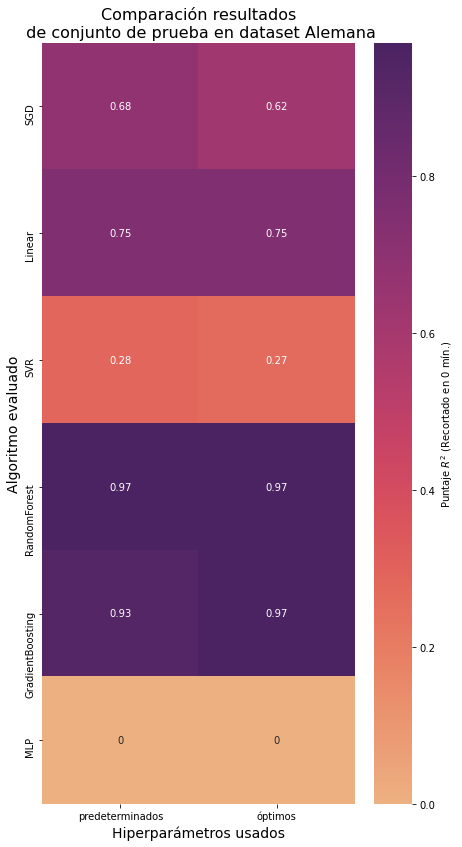

In [8]:
for dataset in dataset_names:
    for test in tests:
        for score in scores:
            draw_comparison(dataset, score, test)

### Visualización de resultados obtenidos en cada dataset, por cada conjunto de datos

<ipython-input-6-f035432eff48>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].figure.axes[-1].set_yticklabels(axes[i].figure.axes[-1].get_yticklabels(), rotation=90, va='center')


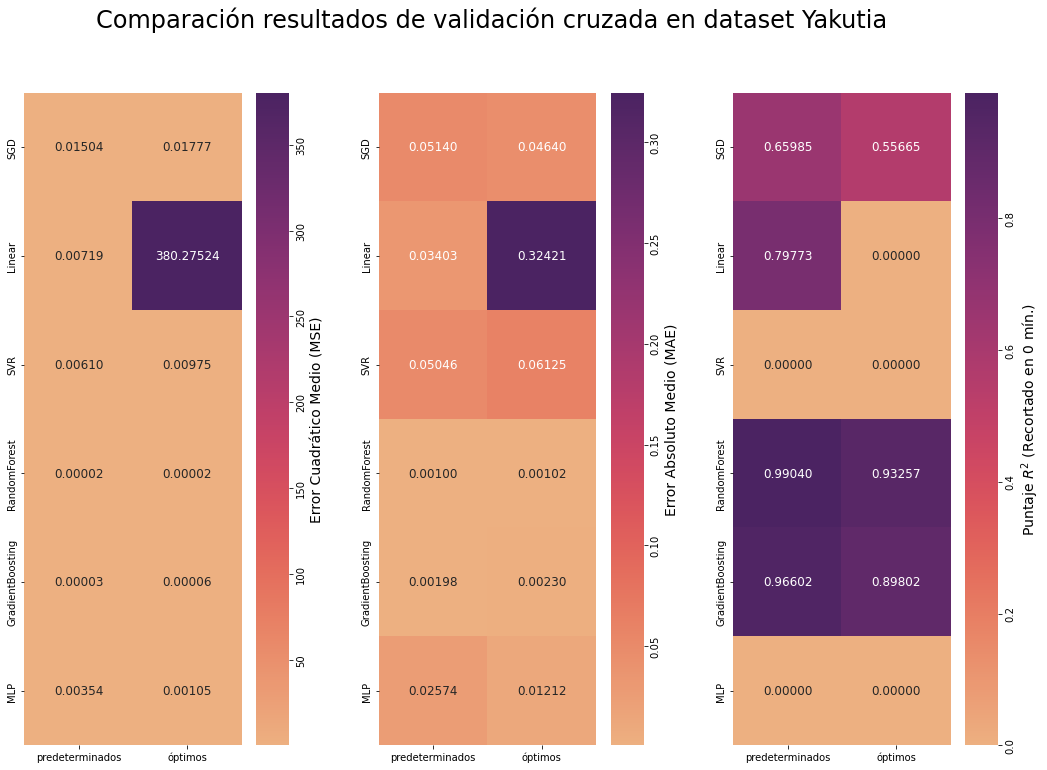

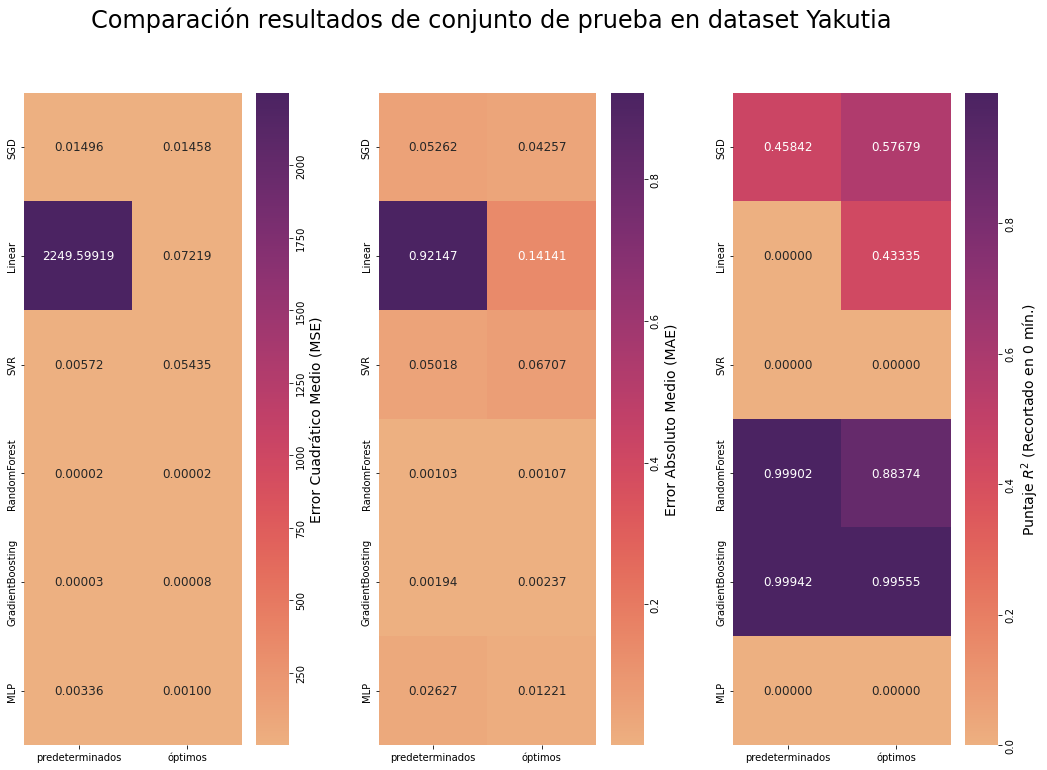

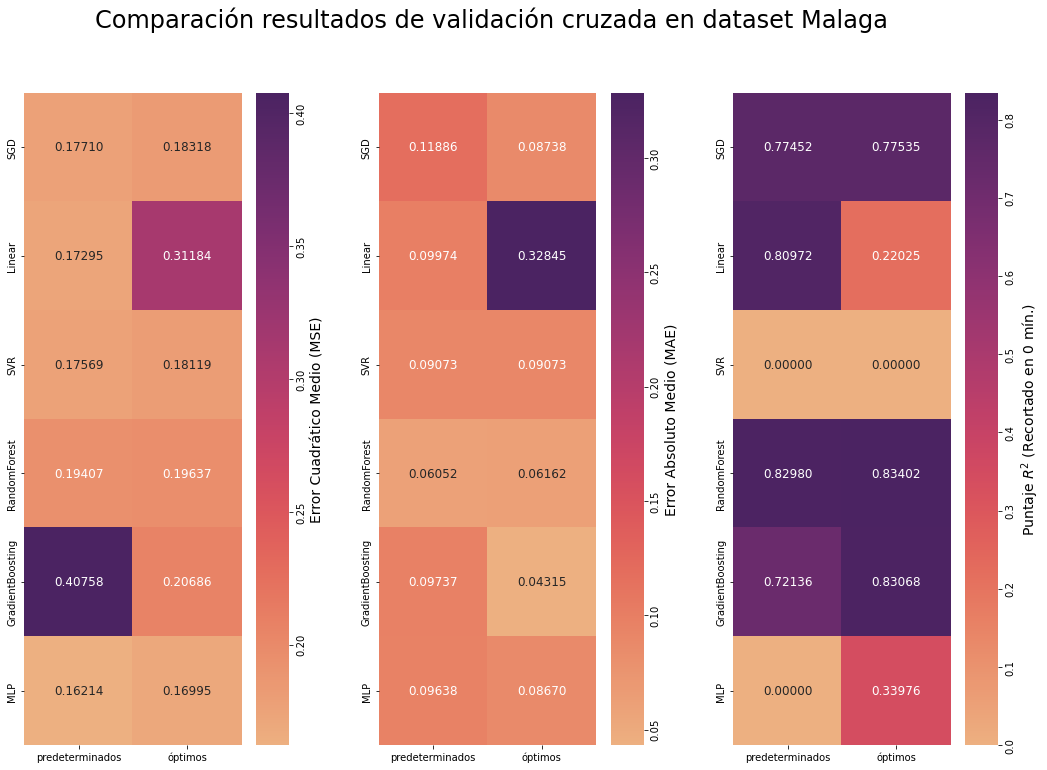

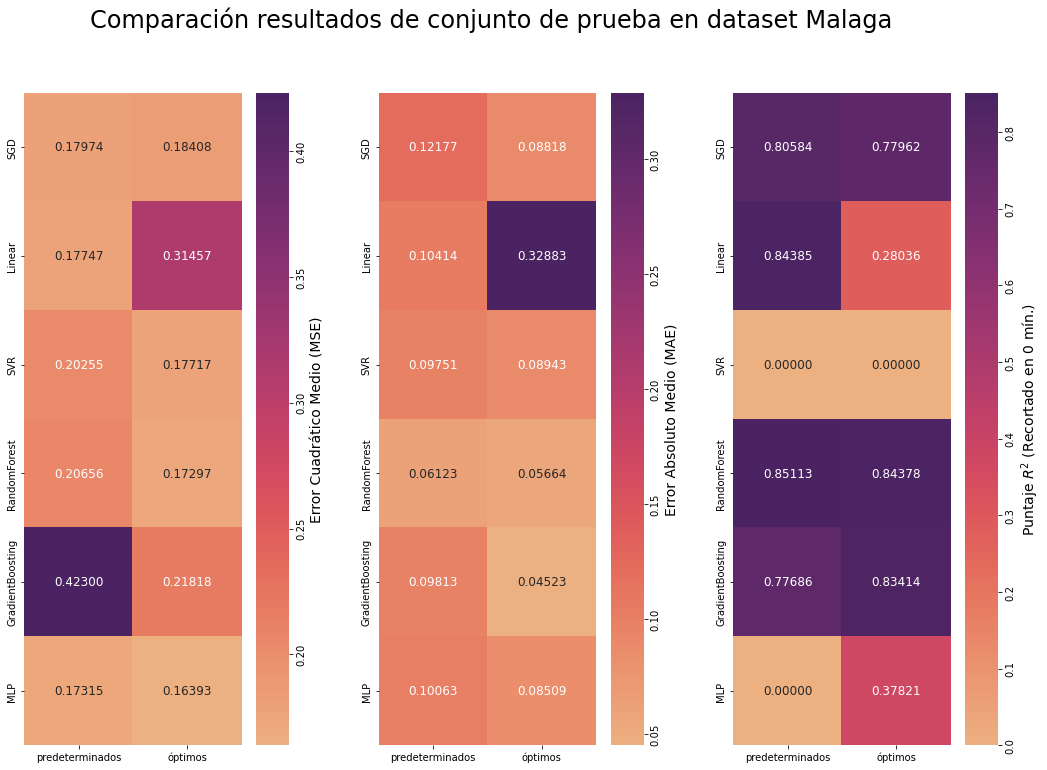

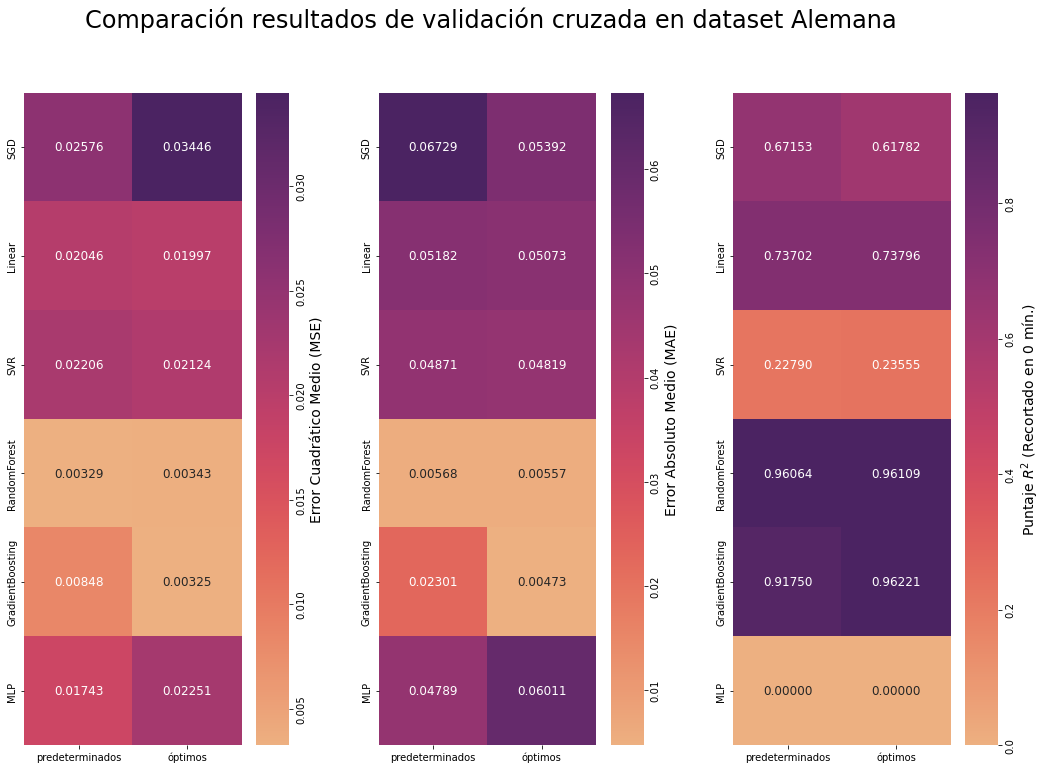

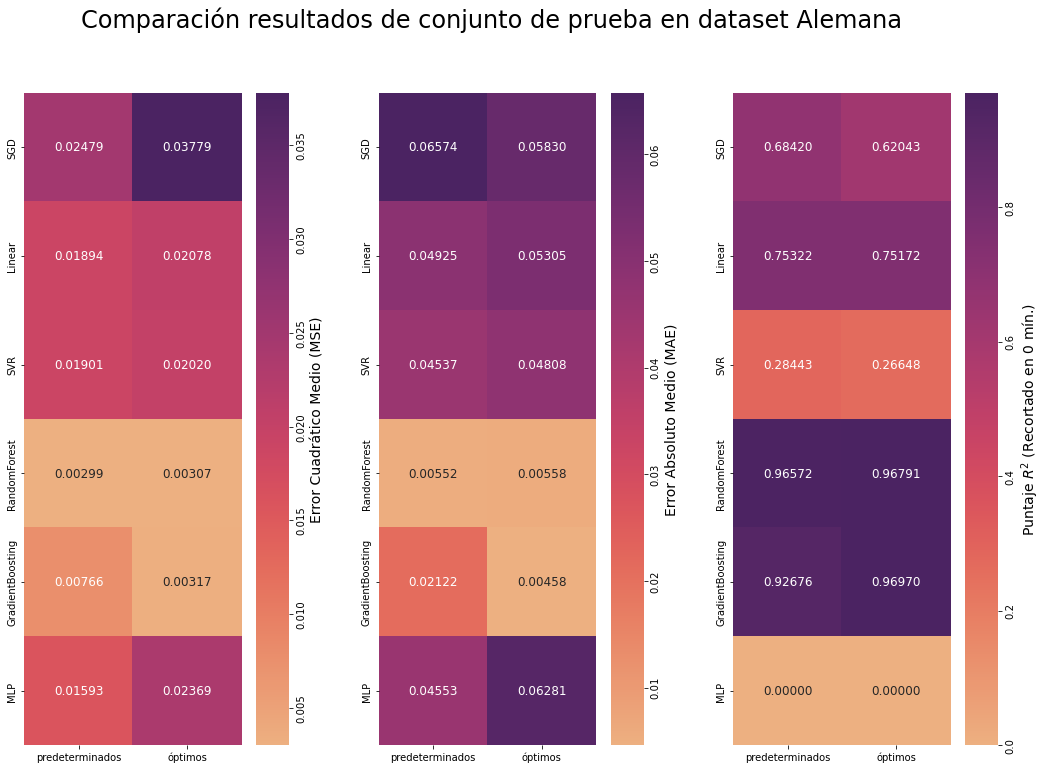

In [9]:
for dataset in dataset_names:
    for test in tests:
        draw_comparison_sum(dataset, test)